# Data-Driven Predictive Modeling of the Smith Disease.

### Abstract
>A new disease has recently been discovered by Dr. Smith, in England.
The disease has already affected more than 5000 people, with no apparent connection between them.
> The most common symptoms include fever and tiredness, but some infected people are asymptomatic.
> Regardless, this virus is being associated with post-disease conditions such as loss of speech, confusion, chest pain and shortness of breath.
> The conditions of the transmission of the disease are still unknown and there are no certainties of what leads a patient to suffer or not from it.
> Nonetheless, some groups of people seem more prone to be infected by the parasite than others.

<div class="alert alert-block alert-warning">

<b>Objective.</b>
>This project aims to develop a predictive model that can predict if a patient will suffer, or not, from the Smith Disease.
The model will be trained on a `dataset containing a small quantity of sociodemographic, health, and behavioral information obtained from the patients`.
The model will be evaluated using `f1 score` of instances correctly predicted.

</div>

### Datasets
> The training set used to build the model.
> In this set, you have the ground truth associated to each patient,
> **if the patient has the disease (Disease = 1) or not (Disease = 0)**
> - train demo.csv - the training set for demographic data and the target train
> - health.csv - the training set for health related data train
> - habits.csv - the training set for habits related data


<div>


[1. Data Exploration](#2ed-bulet)
- [1.1 Load datasets]()
- [1.2 Basic Data Exploration]()
- [1.3 Visual Data Exploration]()
- [1.4 Incoherence Check]()

[2. Data Pre-Processing](##3rd-bullet)
- [3.1 Data Partition]()
- [3.2 Data Cleansing]()
- [3.3 Feature Engineering]()
- [3.4 Feature Scaling]()
- [3.5 Feature Encoding]()

[3. Feature Selection](#4th-bullet)<br>
- [3.1 Feature Selection for Numeric Values]()
- [3.2 Feature Selection for Categorical Values]()

[5. Modelling](#5th-bullet)<br>
- [5.1 Model Evaluation Metrics]()
- [5.2 Models]()
    - [5.1 k-nearest neighbors (KNN)]()
    - [5.2 Logistic Regression (LR)]()
    - [5.3 Support Vector Machine (SVM)]()
    - [5.4 Decision Tree (DT)]()
    - [5.5 Random Forest (RF)]()
    - [5.6 XGBoost Classifier]()
- [5.3 Performance Assessment]()
    - [5.1 ROC Curve]()
    - [5.2 F1 Score]()
</div>

#### Dataset Metadata

Now that we’ve got our data set up, we should spend some time exploring it and understanding what feature each column represents.

| #   | variable	         | Type	     | Description	             |
|-----|-------------------|-----------|--------------------------|
| 1   | PatientID	        | 	Integer  | Id number - Index        |
| 2   | Name	             | Nominal	  | Patient's Name	          |
| 3	  | Birth_Year	       | 	Integer  | Max=1993, min=1855	      |
| 4	  | Region	           | Nominal	  | 10 diiferent values	     |
| 5	  | Education	        | Nominal 	 | 6 different values       |
| 6	  | Disease	          | Integer	  | Binary                   |
| 7	  | Height	           | Integer   | In cm, max=180, min=151	 |
| 8	  | Weight	           | Integer	  | In Kg, max=97, min=40    |
| 9	  | High_Cholesterol	 | Integer	  | Max=568, min=130         |
| 10  | Blood_Pressure	   | Integer	  | Max=200, min=94          |
| 11  | Mental_Health	    | Integer	  | In days, max=29, min=0   |
| 12  | Physical_Health	  | Integer	  | In days, max=30, min=0   |
| 13  | Checkup	          | Nominal	  | 4 different values       |
| 14  | Diabetes	         | Nominal	  | 4 different values       |
| 15  | Smoking_Habit	    | Nominal	  | (1) Yes (2) No           |
| 16  | Drinking_Habit	   | Nominal	  | 3 different values       |
| 17  | Exercise	         | Nominal	  | (1)	Yes (2) No           |
| 18  | Fruit_Habit	      | Nominal	  | 5 different values       |
| 19  | Water_Habit	      | Nominal	  | 3 different values       |

__Import required libraries__

In [1]:
!pip install dabl -q
#libraries imports
import numpy as np
import pandas as pd

import configparser
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, StackingClassifier
import scipy.stats as stats
import xgboost as xgb
import os
import sys

%reload_ext autoreload
%autoreload 2
module_path = os.path.abspath(os.path.join('..')) # or the path to your source code
sys.path.append(module_path)

from src.utils.helpers import *

__Load data & Config files__

In [2]:
# Load the config file
config = configparser.ConfigParser()
config.read('config.ini')
figures_path = config['assets']['figures_path']
images_path = config['assets']['images_path']
submission_path = config['data']['submission_path']

helper = Helper()

In [3]:
# load train data sets
df = load_data(config['data']['train_path'])

In [4]:
# load test data sets
df_test = load_data(config['data']['test_path'])

<div class="alert alert-block alert-info">

<a class="anchor" id="eda">

### 1. Exploratory Data Analysis __(EDA)__

</a>
</div>

Exploratory Data Analysis __(EDA)__, is the process of examining and understanding the structure of a dataset. It's a critical part of any machine learning project, and helps to approach data and get comfortable with all sorts of its characteristics.

In [5]:
# Indexing
df.set_index('PatientID', inplace=True)
df_test.set_index('PatientID', inplace=True)

#### 1.2 Basic Exploration (Understanding the data)

__Examining the DataSet__

In [6]:
# dataset head
df.head(5)

,Name,Birth_Year,Region,Education,Disease,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit
PatientID,,,,,,,,,,,,,,,,,,
1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
1658,Mr. David Caffee,1958,London,University Complete (3 or more years),0,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
1544,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1167 to 1117
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         787 non-null    object
 4   Disease           800 non-null    int64 
 5   Height            800 non-null    int64 
 6   Weight            800 non-null    int64 
 7   High_Cholesterol  800 non-null    int64 
 8   Blood_Pressure    800 non-null    int64 
 9   Mental_Health     800 non-null    int64 
 10  Physical_Health   800 non-null    int64 
 11  Checkup           800 non-null    object
 12  Diabetes          800 non-null    object
 13  Smoking_Habit     800 non-null    object
 14  Drinking_Habit    800 non-null    object
 15  Exercise          800 non-null    object
 16  Fruit_Habit       800 non-null    object
 17  Water_Habit 

__Statistical Summary__

In [8]:
# Numerical
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,800,799,Mr. Gary Miller,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Birth_Year,800.0,NaN,NaN,NaN,1966.04375,15.421872,1855.0,1961.0,1966.0,1974.0,1993.0
Region,800,10,East Midlands,154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,787,6,University Complete (3 or more years),239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Disease,800.0,NaN,NaN,NaN,0.51375,0.500124,0.0,0.0,1.0,1.0,1.0
Height,800.0,NaN,NaN,NaN,167.80625,7.976888,151.0,162.0,167.0,173.0,180.0
Weight,800.0,NaN,NaN,NaN,67.8275,12.11347,40.0,58.0,68.0,77.0,97.0
High_Cholesterol,800.0,NaN,NaN,NaN,249.3225,51.566631,130.0,213.75,244.0,280.0,568.0
Blood_Pressure,800.0,NaN,NaN,NaN,131.05375,17.052693,94.0,120.0,130.0,140.0,200.0
Mental_Health,800.0,NaN,NaN,NaN,17.345,5.385139,0.0,13.0,18.0,21.0,29.0


In [9]:
# Categorical
df.describe(include=['O']).T

,count,unique,top,freq
Name,800,799,Mr. Gary Miller,2
Region,800,10,East Midlands,154
Education,787,6,University Complete (3 or more years),239
Checkup,800,4,More than 3 years,429
Diabetes,800,4,Neither I nor my immediate family have diabetes.,392
Smoking_Habit,800,2,No,673
Drinking_Habit,800,3,I usually consume alcohol every day,406
Exercise,800,2,No,536
Fruit_Habit,800,5,Less than 1. I do not consume fruits every day.,452
Water_Habit,800,3,Between one liter and two liters,364


#### 1.3 Visual Data Exploration

Data exploration is the first step of data analysis used to explore and visualize data to uncover insights from the start or identify areas or patterns to dig into more.

In [10]:
# Define metric and non-metric features.
metric_features = df.select_dtypes(include=np.number).columns.tolist()
non_metric_features = df.columns.drop(metric_features).to_list()

In [11]:
# Remove target/dependent and redundant variables from metric features
metric_features.remove('Disease')
non_metric_features.remove('Name')

__Numeric Variables' Frequencies__

__`Box Plots`__

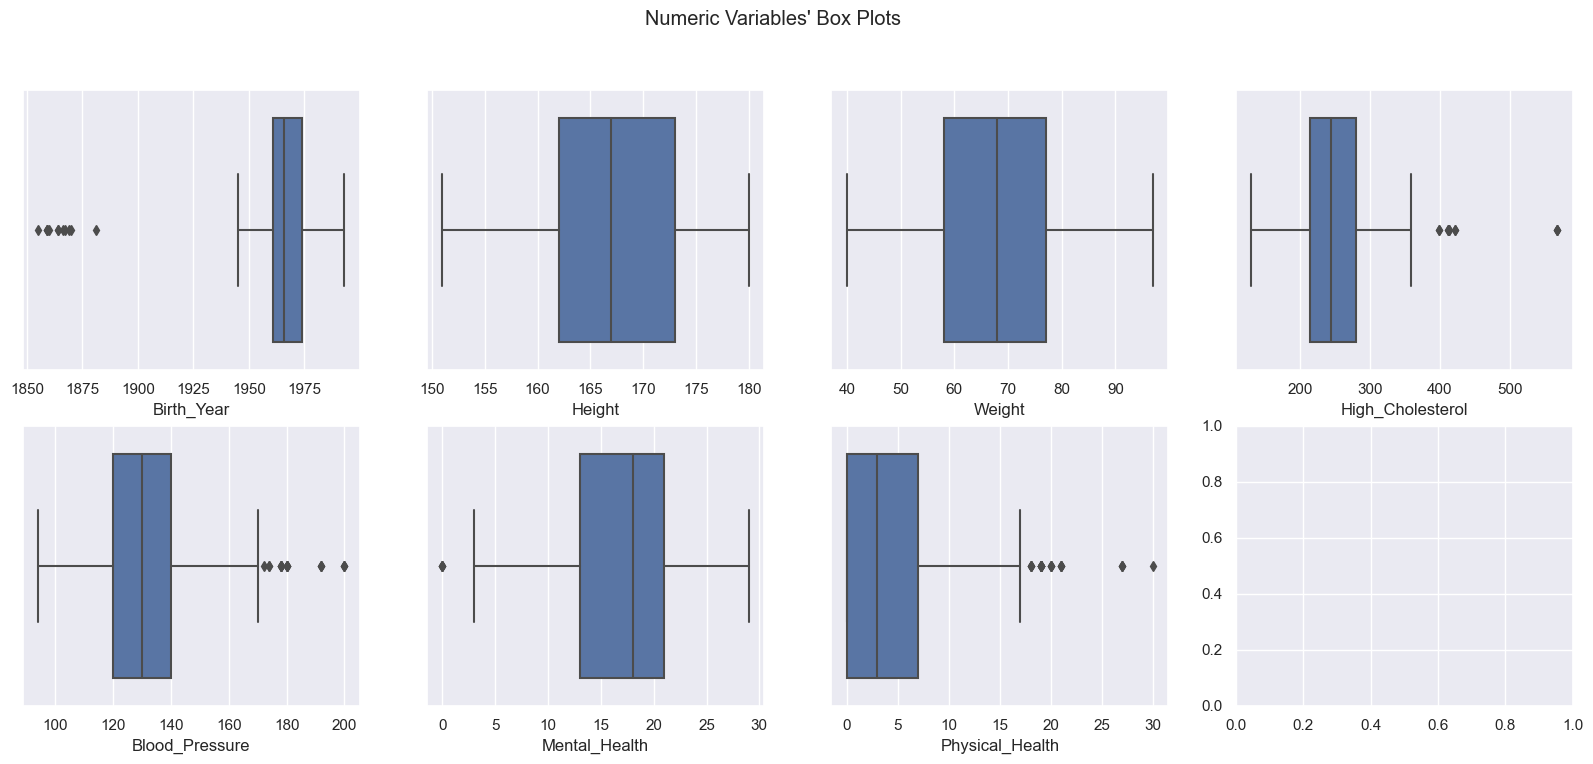

In [12]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 8))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=df[feat], ax=ax)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.savefig(os.path.join(figures_path, 'numeric_variables_frequencies_boxplots.png'), dpi=200)
plt.show()

__`Histograms`__

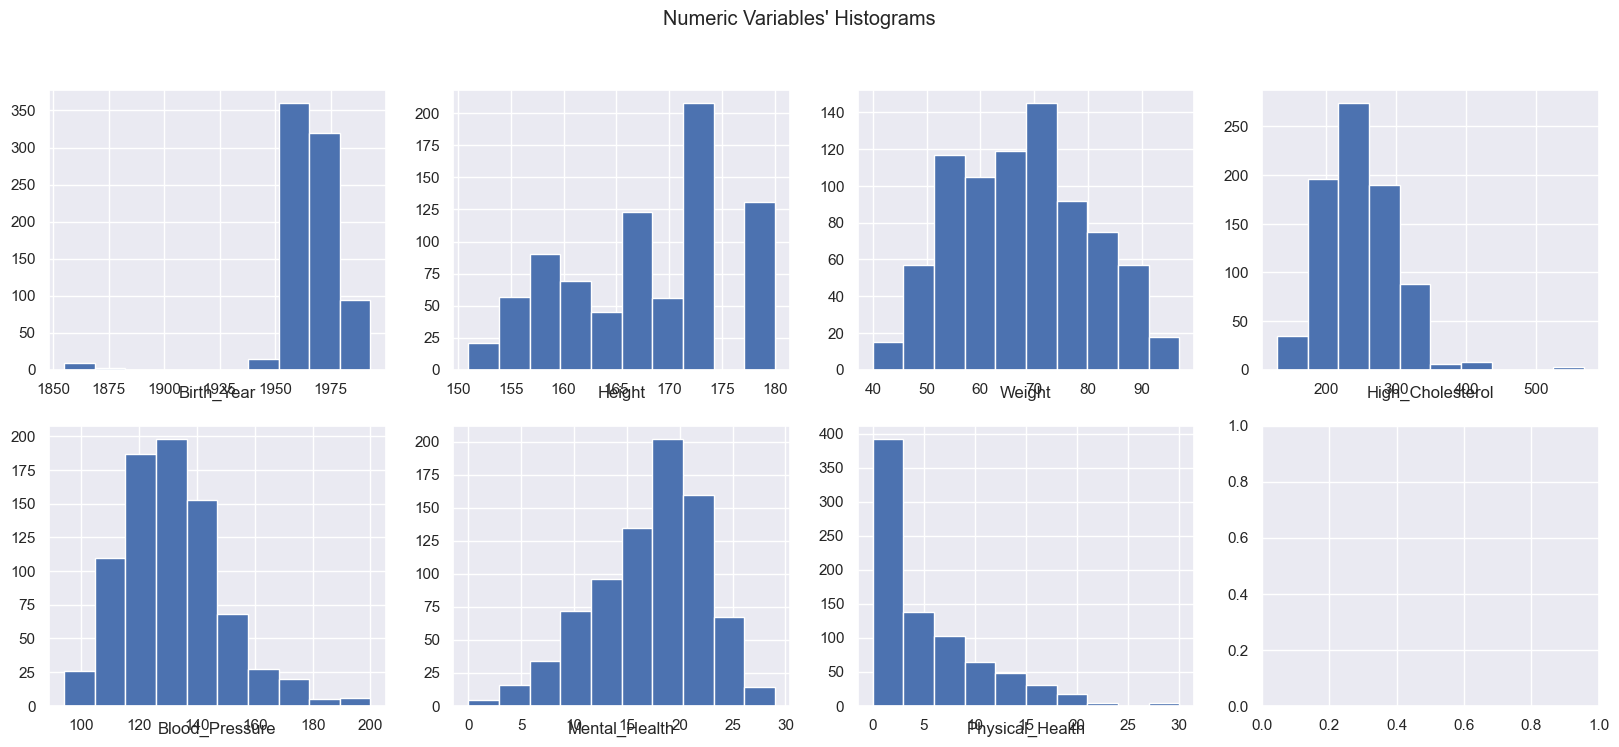

In [13]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 8))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(df[feat])
    ax.set_title(feat, y=-0.13)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.savefig(os.path.join(figures_path, 'numeric_variables_frequencies_histograms.png'), dpi=200)
plt.show()

__Categorical Variables' Frequencies__

Let's take a look on __Categorical Variables' Uni-variate Distribution__ in the dataset.

__`Histograms`__

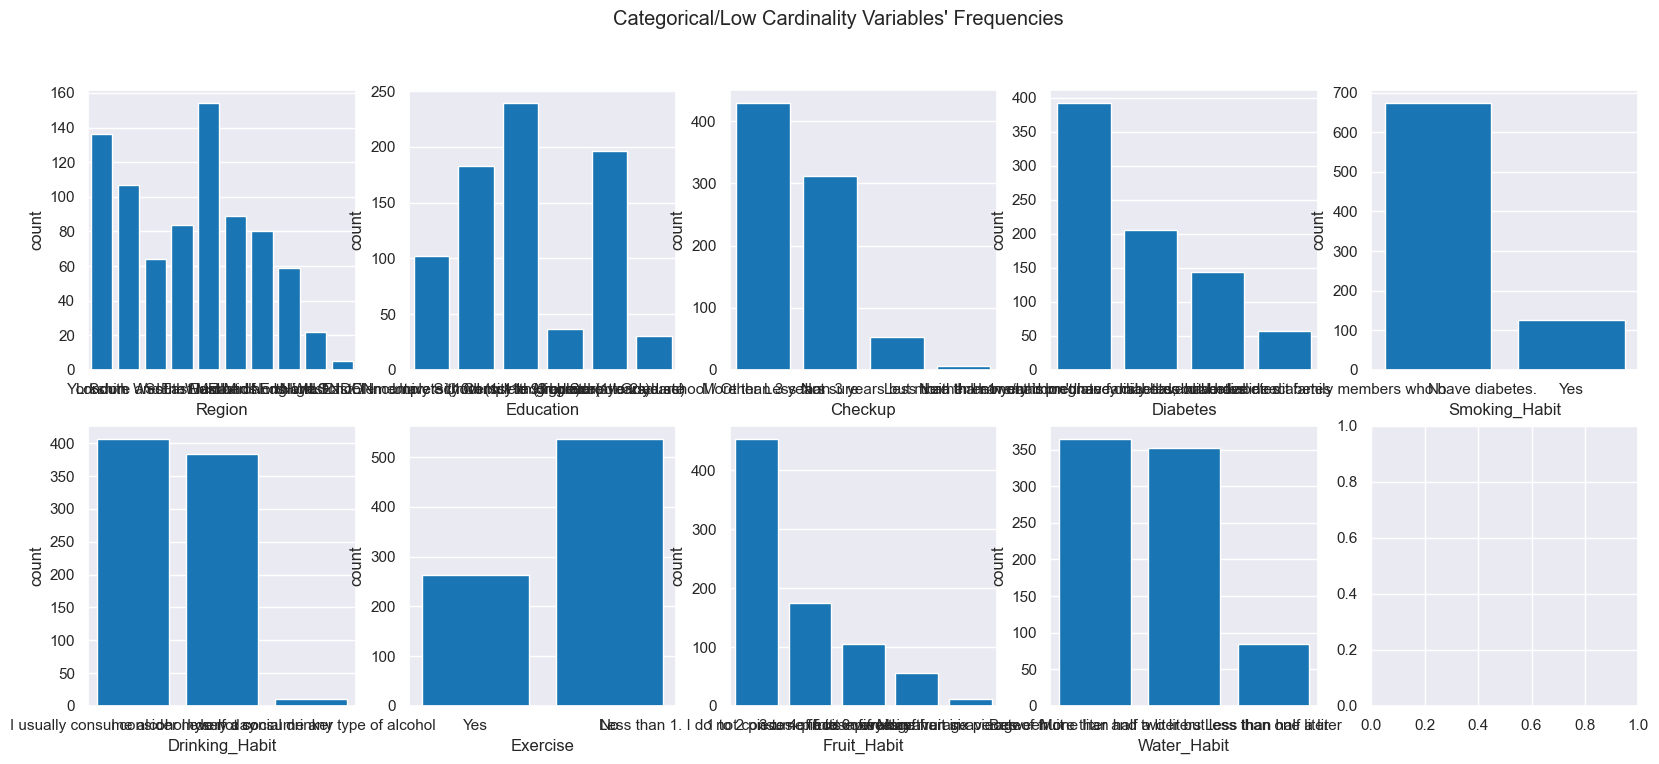

In [14]:
# All Non-Metric Variables' Absolute Frequencies
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize=(20, 8))

# Plot data
# Iterate across axes objects and associate each bar plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), non_metric_features): # Notice the zip() function and flatten() method
    sns.countplot(x=df[feat].astype(object), ax=ax, color='#007acc')

title = "Categorical/Low Cardinality Variables' Frequencies"
plt.suptitle(title)

plt.savefig(os.path.join(figures_path, 'categorical_variables_frequencies_histograms.png'), dpi=200)
plt.show()

__`CrossTab BarPlot`__

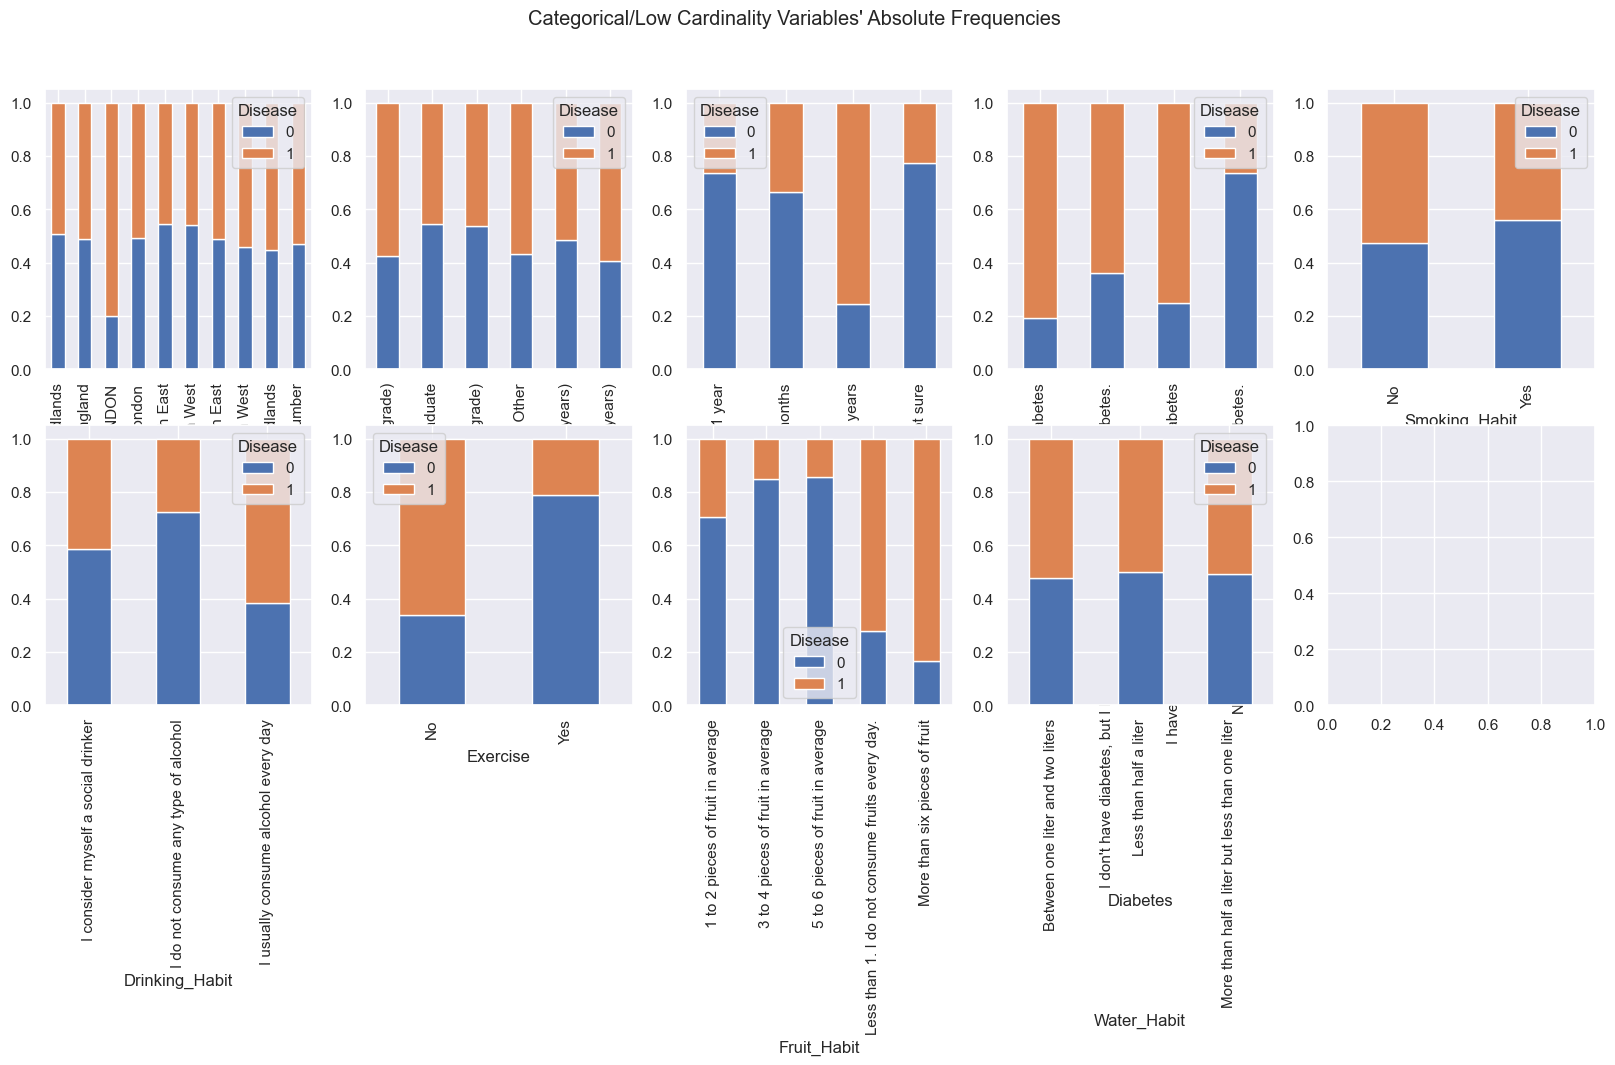

In [15]:

# All Non-Metric Variables' Frequencies
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize=(20, 8))

# Plot data
# Iterate across axes objects and associate each bar plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), non_metric_features): # Notice the zip() function and flatten() method
    #sns.countplot(x=df[feat].astype(object), ax=ax, color='#007acc')
    table=pd.crosstab(df[feat], df.Disease)
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', ax=ax, stacked=True)


title = "Categorical/Low Cardinality Variables' Absolute Frequencies"
plt.suptitle(title)

plt.savefig(os.path.join(figures_path, 'categorical_variables_frequencies_crosstab_Bar.png'), dpi=200)
plt.show()

__`Countplot`__

In [16]:
df['Disease'].value_counts(normalize=True)*100

1    51.375
0    48.625
Name: Disease, dtype: float64

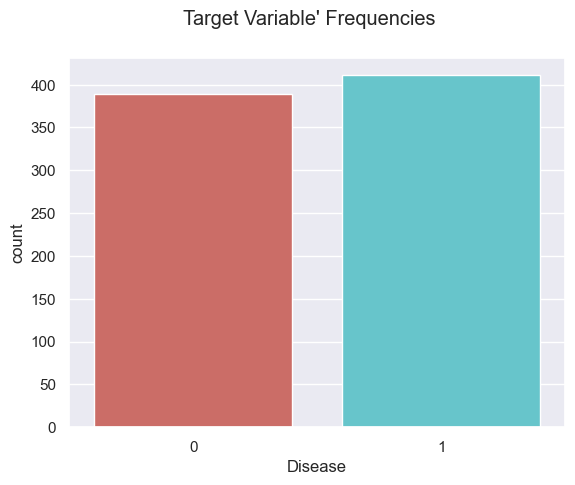

<Figure size 1000x1000 with 0 Axes>

In [17]:
sns.countplot(x='Disease', data=df, palette='hls')

title = "Target Variable' Frequencies"
plt.suptitle(title)
plt.figure(figsize=(10, 10))
plt.savefig(os.path.join(figures_path, 'target_variable_frequencies_countplot.png'), dpi=200)
plt.show()

__`Correlation coefficients`__

In [18]:
df[metric_features].corr().round(2)

,Birth_Year,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
Birth_Year,1.00,0.10,0.16,-0.23,-0.12,0.20,-0.16
Height,0.10,1.00,0.51,-0.09,-0.02,-0.04,0.06
Weight,0.16,0.51,1.00,-0.05,-0.09,0.30,-0.39
High_Cholesterol,-0.23,-0.09,-0.05,1.00,0.12,0.00,0.04
Blood_Pressure,-0.12,-0.02,-0.09,0.12,1.00,-0.03,0.16
Mental_Health,0.20,-0.04,0.30,0.00,-0.03,1.00,-0.33
Physical_Health,-0.16,0.06,-0.39,0.04,0.16,-0.33,1.00


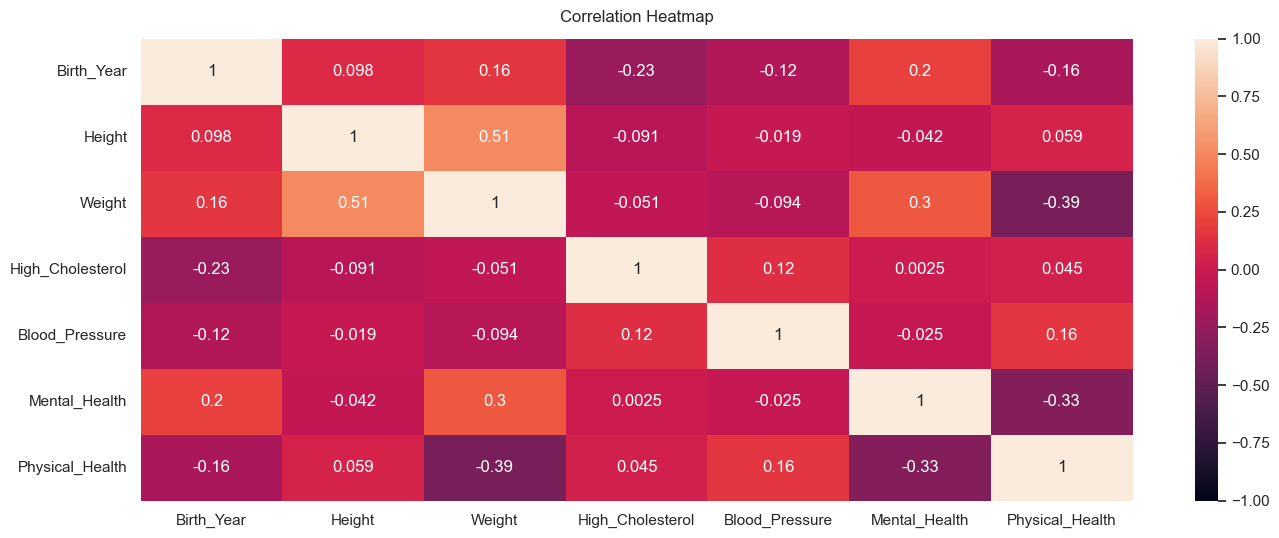

In [19]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df[metric_features].corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

__Insights:__
- uni-variate distributions (Gaussian distribution)
- potential uni-variate outliers
- We’re dealing with a binary classification problem

__1.4 Incoherence Check__

Process of identifying inconsistencies or discrepancies in data, information, or arguments.
It can occur when there is a lack of consistency or agreement in the data, such as errors, discrepancies, or contradictions in data values or data types.

- Find inconsistent values,
- Missing Values,
- Outliers
- Any other problem you may find in your dataset

__Missing & Duplicate Values__

In [20]:
# check for nan/null
df.isnull().values.any()

True

In [21]:
# count of missing values
df.isna().sum()

Name                 0
Birth_Year           0
Region               0
Education           13
Disease              0
Height               0
Weight               0
High_Cholesterol     0
Blood_Pressure       0
Mental_Health        0
Physical_Health      0
Checkup              0
Diabetes             0
Smoking_Habit        0
Drinking_Habit       0
Exercise             0
Fruit_Habit          0
Water_Habit          0
dtype: int64

In [22]:
# duplicated observations
df.duplicated().sum()

0

__Detect Outliers__

Common methods for detecting outliers by

- [__empirical rule / 68-95-99.7 rule__](https://en.wikipedia.org/wiki/68–95–99.7_rule) 99.7% of all data in a normal distribution lies within three standard deviations of the mean so any value lie outside +/- 3 standard deviations consider as outlier.

- [__IQR Rule__](https://en.wikipedia.org/wiki/Interquartile_range) For Any value that is 1.5 x IQR greater than the third quartile is designated as an outlier and any value that is 1.5 x IQR less than the first quartile is also designated as an outlier.+/- 3 standard deviations in our dataset.

__`detect_outliers_empirical`__ function can identify outliers +/- 3 standard deviations in our dataset.

__`detect_outliers_iqr`__ function can identify outliers using IQR method.


In [23]:
summary_emp, outs_emp = detect_outliers(data=df, method = 'emp')
summary_emp

{'Birth_Year': 12,
 'High_Cholesterol': 9,
 'Blood_Pressure': 6,
 'Mental_Health': 4,
 'Physical_Health': 8}

In [24]:
summary_iqr, outs_iqr = detect_outliers(data=df, method='iqr')
summary_iqr

{'Birth_Year': 12,
 'High_Cholesterol': 11,
 'Blood_Pressure': 19,
 'Mental_Health': 4,
 'Physical_Health': 25}

Determining whether a value is an outlier that should be removed or not is very subjective. And while there are certainly valid reasons for throwing away outliers if they are the result of a computer glitch or a human error, eliminating every extreme value is not always a good idea.
In our case, for instance, there are some outliers that are unusual values and impossible to occur `Birth_Year`.
At the same time, there are some values that can present important information about the data. The extreme values in the columns `High Chrolesterol`, `Blood Presure`, `Mental Health` and `Physical Health` for example, represent a higher percentage of patients.

By calling the `detect_outliers(df)` method, we can detect outliers in our dataset, So before deciding to drop or keeps them we need to investigate __the nature of the outlier__:
- `High Chrolesterol` & `Blood Presure` - It is obvious that it's an outlier for a legitimate reason and by performing additional examination found that both  outliers even its high measurements but still acceptable, as these records could be influential to the model keeping them is mandatory.
- `Mental Health` & `Physical Health`: It is obvious that it's an outlier for a legitimate reason as well, some patients didn't have days with mental health and were very active in last 30 days, on the other side some patients been in physical illness or injury most of the time in last 30 days. as these records could be influential to the model keeping them is mandatory.
- `Birth Year`: Drop irrelevant outliers as it's really positive mistaken.

**Conclusion:** While some values will be dealt with due to inaccuracy, some extreme values will be kept to further investigate their meaning.

<div class="alert alert-block alert-info">

<a class="anchor" id="eda">

### 2.  Data Pre-processing
</a>
</div>


In [25]:
# Define Independent and target/dependent variables.
X = df.drop(columns=['Disease'], axis= 1)
y = df['Disease']

__2.1__ __Data Partitioning__

Partitioning divides the dataset randomly into either two or three parts: training, testing and (optionally) validation, and is used to test the performance of a single model.

- Splitting data set into train and test sets before doing any processing to the data to avoid Data Leakage in future..

__`train_test_split`__ function below to perform the split and returns four sequences of our dataset in this order:
`x_train`: The training part of the first sequence (x)
`x_val`: The test part of the first sequence (x)
`y_train`: The training part of the second sequence (y)
`y_val`: The test part of the second sequence (y)

In [26]:
# Split dataset into train (70%) and validation (30%).
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=15, stratify= y)
X_test = df_test

__`2.2`__ __Data Cleansing__

`Cleansing` - Process of identifying and resolving corrupt, inaccurate, or irrelevant data.

__Data Imputation__

Imputation is a technique used for replacing the missing data with some substitute value to retain most of the data/information of the dataset.

In [27]:
# Replacing Missing Data In data Education column With The Most Frequent Values (mode) as it's categorical & Nans very small of data
X_train['Education'].fillna(value=X_train['Education'].mode()[0], inplace=True)
X_val['Education'].fillna(value=X_val['Education'].mode()[0], inplace=True)
X_test['Education'].fillna(value=X_test['Education'].mode()[0], inplace=True)

__Outliers Removal__

In [28]:
summary_train, outs_train = detect_outliers(X_train)
outs_train_df = X_train[~X_train['Birth_Year'].isin(pd.Series(outs_train['Birth_Year']))]
print('Percentage of train data kept after removing outliers:', np.round(outs_train_df.shape[0] / X_train.shape[0], 4))

summary_val, outs_val = detect_outliers(X_val)
outs_val_df = X_val[~X_val['Birth_Year'].isin(pd.Series(outs_val['Birth_Year']))]
print('Percentage of validation data kept after removing outliers:', np.round(outs_val_df.shape[0] / X_val.shape[0], 4))

# Overwrite the dataframe with outlier rows removed in train & test df.
X_train = outs_train_df.copy()
X_val = outs_val_df.copy()

Percentage of train data kept after removing outliers: 0.9839
Percentage of validation data kept after removing outliers: 0.9875


In [29]:
# Update target variables after removing outliers
y_train = y_train[X_train.index]
y_val = y_val[X_val.index]
y_train.head()

PatientID
1660    0
1767    0
1921    0
1497    0
1510    1
Name: Disease, dtype: int64

In [30]:
# Converting to "int" over "bool".
y_train = y_train.astype(int)
y_val = y_val.astype(int)

In [31]:
# Print frequency of categories
for col in X_val.select_dtypes(include=object).columns:
    print ('\nFrequency of Categories for variable %s'%col)
    print (X_train[col].value_counts())


Frequency of Categories for variable Name
Mr. Charles Tobin    1
Mr. John Hess        1
Mr. Bruce Austin     1
Mrs. Peggy Perez     1
Mr. Harold White     1
                    ..
Mr. Jake Cross       1
Mr. Richard Rohe     1
Mrs. Hazel Eison     1
Mr. Harvey Mulac     1
Mrs. Opal Miller     1
Name: Name, Length: 551, dtype: int64

Frequency of Categories for variable Region
London                      110
East Midlands               110
South West                   71
South East                   58
East of England              55
West Midlands                49
Yorkshire and the Humber     45
North West                   35
North East                   15
LONDON                        3
Name: Region, dtype: int64

Frequency of Categories for variable Education
University Complete (3 or more years)          171
High School Graduate                           132
Elementary School (1st to 9th grade)           128
High School Incomplete (10th to 11th grade)     73
I never attended schoo

In [32]:
# Modify Region and fixing typos
X_train['Region'] = X_train['Region'].replace({'LONDON':'London'})
X_val['Region'] = X_val['Region'].replace({'LONDON':'London'})
X_test['Region'] = X_test['Region'].replace({'LONDON':'London'})

2.3 Feature Engineering

`Feature engineering` is the process that takes raw data and transforms it into features that can be used to create a predictive model


In [33]:
# Converting 'Yes' and 'No' to "boolean".
X_train['Exercise'] = X_train['Exercise'].map({'Yes':True ,'No':False}).astype("boolean")
X_val['Exercise'] = X_val['Exercise'].map({'Yes':True ,'No':False}).astype("boolean")
X_test['Exercise'] = X_test['Exercise'].map({'Yes':True ,'No':False}).astype("boolean")

X_train['Smoking_Habit'] = X_train['Smoking_Habit'].map({'Yes':True ,'No':False}).astype("boolean")
X_val['Smoking_Habit'] = X_val['Smoking_Habit'].map({'Yes':True ,'No':False}).astype("boolean")
X_test['Smoking_Habit'] = X_test['Smoking_Habit'].map({'Yes':True ,'No':False}).astype("boolean")

__Feature Extraction__

In [34]:
# inserting new column 'Age' to carry patient age.
X_train.insert(3, 'Age', pd.Timestamp('now').year - X_train['Birth_Year'])
X_val.insert(3, 'Age', pd.Timestamp('now').year - X_val['Birth_Year'])
X_test.insert(3, 'Age', pd.Timestamp('now').year - X_test['Birth_Year'])

__Eliminate Irrelevant variables__

In [35]:
X_train = X_train.drop(columns = ['Name', 'Birth_Year'])
X_val = X_val.drop(columns = ['Name', 'Birth_Year'])
X_test = X_test.drop(columns = ['Name', 'Birth_Year'])

In [36]:
# Re-Define metric and non-metric features.
metric_features_ = X_train.select_dtypes(include=np.number).columns.tolist()
non_metric_features_ = X_train.columns.drop(metric_features_).to_list()

__Binning Numerical Features__

Dividing continuous or other numerical features into distinct groups.

- Blood Pressure in rest value (Diastolic)
- Cholesterol value

In [37]:
X_train['Blood_Pressure_grp'] = X_train['Blood_Pressure'].apply(get_hypertension_grp)
X_val['Blood_Pressure_grp'] = X_val['Blood_Pressure'].apply(get_hypertension_grp)
X_test['Blood_Pressure_grp'] = X_test['Blood_Pressure'].apply(get_hypertension_grp)

In [38]:
X_train['High_Cholesterol_grp'] = X_train['High_Cholesterol'].apply(get_HDL_cholesterol_grp)
X_val['High_Cholesterol_grp'] = X_val['High_Cholesterol'].apply(get_HDL_cholesterol_grp)
X_test['High_Cholesterol_grp'] = X_test['High_Cholesterol'].apply(get_HDL_cholesterol_grp)

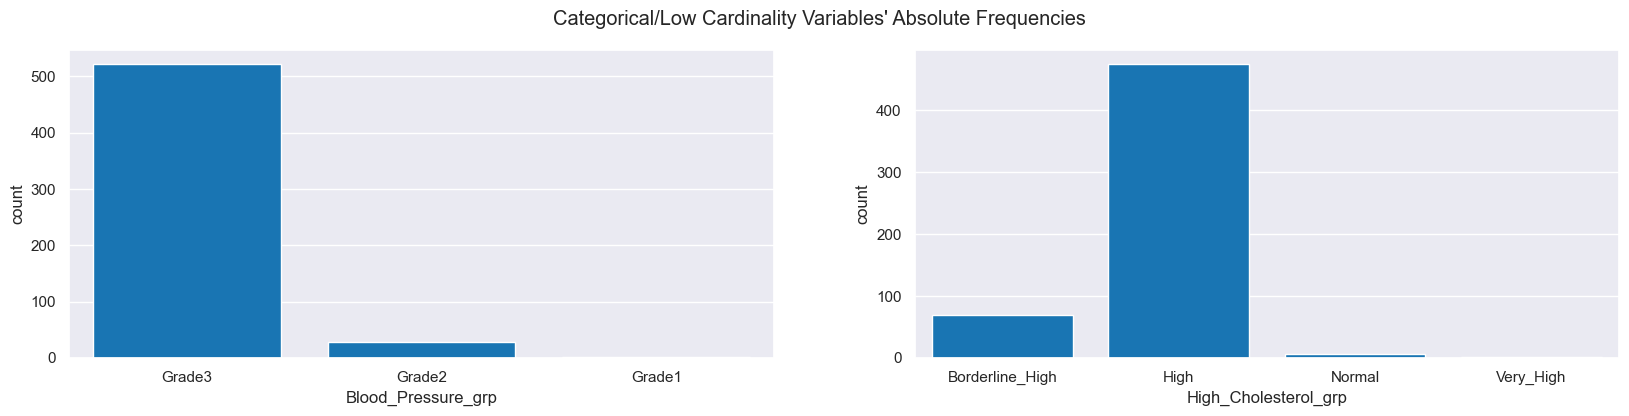

In [39]:
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(1, 2, figsize=(20, 4))

# Plot data
# Iterate across axes objects and associate each bar plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), ['Blood_Pressure_grp', 'High_Cholesterol_grp']): # Notice the zip() function and flatten() method
    sns.countplot(x=X_train[feat].astype(object), ax=ax, color='#007acc')

title = "Categorical/Low Cardinality Variables' Absolute Frequencies"
plt.suptitle(title)

plt.savefig(os.path.join(figures_path, 'BP_HC_Grade_frequecies.png'), dpi=200)
plt.show()

__2.4__ __Feature Scaling__

__Data Normalization__

`Normalization` is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

In [40]:
X_train.head(5)

,Region,Age,Education,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Blood_Pressure_grp,High_Cholesterol_grp
PatientID,,,,,,,,,,,,,,,,,,
1660,South East,62,Elementary School (1st to 9th grade),162,65,170,138,12,17,More than 3 years,Neither I nor my immediate family have diabetes.,False,I consider myself a social drinker,True,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,Grade3,Borderline_High
1767,East of England,69,University Complete (3 or more years),167,57,197,144,16,16,Not sure,Neither I nor my immediate family have diabetes.,True,I usually consume alcohol every day,False,3 to 4 pieces of fruit in average,Less than half a liter,Grade3,Borderline_High
1921,London,59,Elementary School (1st to 9th grade),171,71,222,146,7,9,Not sure,Neither I nor my immediate family have diabetes.,False,I usually consume alcohol every day,False,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,Grade3,High
1497,London,58,High School Graduate,162,70,236,154,21,0,More than 3 years,I do have diabetes,False,I consider myself a social drinker,False,1 to 2 pieces of fruit in average,Between one liter and two liters,Grade3,High
1510,Yorkshire and the Humber,55,High School Incomplete (10th to 11th grade),166,78,292,132,20,0,More than 3 years,I do have diabetes,True,I consider myself a social drinker,True,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,Grade3,High


In [41]:
X_train_norm_scaled = X_train[metric_features_].copy()
X_val_norm_scaled = X_val[metric_features_].copy()
X_test_norm_scaled = X_test[metric_features_].copy()

X_train_norm_scaled.head(5)

,Age,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
PatientID,,,,,,,
1660,62,162,65,170,138,12,17
1767,69,167,57,197,144,16,16
1921,59,171,71,222,146,7,9
1497,58,162,70,236,154,21,0
1510,55,166,78,292,132,20,0


In [42]:
# Use MinMaxScaler to scale the data
minMax_scaler = MinMaxScaler()

# Fit scaler & transform training data
X_train_norm = minMax_scaler.fit_transform(X_train_norm_scaled)

# transform val data
X_val_norm = minMax_scaler.transform(X_val_norm_scaled)

# transform test data
X_test_norm = minMax_scaler.transform(X_test_norm_scaled)

In [43]:
# See what the fit method is doing (notice the trailing underscore):
print("Parameters fitted:\n", minMax_scaler.data_min_, "\n", minMax_scaler.data_max_)

Parameters fitted:
 [ 30. 151.  40. 130.  94.   0.   0.] 
 [ 78. 180.  97. 568. 200.  29.  30.]


In [44]:
X_train_norm_scaled[metric_features_] = X_train_norm
X_test_norm_scaled[metric_features_] = X_test_norm
X_train_norm_scaled.head()

,Age,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
PatientID,,,,,,,
1660,0.666667,0.379310,0.438596,0.091324,0.415094,0.413793,0.566667
1767,0.812500,0.551724,0.298246,0.152968,0.471698,0.551724,0.533333
1921,0.604167,0.689655,0.543860,0.210046,0.490566,0.241379,0.300000
1497,0.583333,0.379310,0.526316,0.242009,0.566038,0.724138,0.000000
1510,0.520833,0.517241,0.666667,0.369863,0.358491,0.689655,0.000000


In [45]:
X_val_norm_scaled[metric_features_] = X_val_norm
X_val_norm_scaled.head()

,Age,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
PatientID,,,,,,,
1787,0.458333,0.551724,0.315789,0.392694,0.433962,0.379310,0.666667
1314,0.229167,0.379310,0.526316,0.166667,0.433962,0.827586,0.200000
1973,0.458333,0.724138,0.385965,0.271689,0.292453,0.724138,0.366667
1198,0.645833,0.206897,0.508772,0.438356,0.075472,0.689655,0.000000
1049,0.645833,0.793103,0.842105,0.237443,0.216981,0.689655,0.200000


In [46]:
# Checking max and min of X_train_norm variables
X_train_norm_scaled.describe().round(2)

,Age,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
count,551.00,551.00,551.00,551.00,551.00,551.00,551.00
mean,0.53,0.58,0.49,0.27,0.35,0.59,0.15
std,0.19,0.27,0.21,0.12,0.16,0.18,0.18
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.40,0.38,0.33,0.19,0.25,0.45,0.00
50%,0.56,0.55,0.49,0.26,0.34,0.62,0.10
75%,0.67,0.76,0.63,0.34,0.43,0.72,0.23
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00


__Data Standardization__

`Standardization` is the process of placing dissimilar features on the same scale. Standardized data in other words can be defined as rescaling the attributes in such a way that their mean is 0 and standard deviation becomes 1.

In [47]:
X_train_stand_scaled = X_train[metric_features_].copy()
X_val_stand_scaled = X_val[metric_features_].copy()
X_test_stand_scaled = X_test[metric_features_].copy()

X_train_stand_scaled.head()

,Age,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
PatientID,,,,,,,
1660,62,162,65,170,138,12,17
1767,69,167,57,197,144,16,16
1921,59,171,71,222,146,7,9
1497,58,162,70,236,154,21,0
1510,55,166,78,292,132,20,0


In [48]:
# Use StandardScaler to scale the data
stand_scaler = StandardScaler()

# Fit scaler & transform training data
X_train_stand = stand_scaler.fit_transform(X_train_stand_scaled)

# transform val data
X_val_stand = stand_scaler.transform(X_val_stand_scaled)

# transform test data
X_test_stand = stand_scaler.transform(X_test_stand_scaled)

In [49]:
# See what the fit method is doing (notice the trailing underscore):
print("Parameters fitted:\n", stand_scaler.mean_, "\n", stand_scaler.var_)

Parameters fitted:
 [ 55.50816697 167.78402904  67.80943739 249.11252269 131.39745917
  17.21778584   4.47368421] 
 [  79.88332713   63.01143277  141.65334106 2689.33398111  287.61879572
   28.5006637    28.02426211]


In [50]:
X_train_stand_scaled[metric_features_] = X_train_stand
X_test_stand_scaled[metric_features_] = X_test_stand
X_train_stand_scaled.head()

,Age,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
PatientID,,,,,,,
1660,0.726339,-0.728653,-0.236051,-1.525537,0.389316,-0.977369,2.366226
1767,1.509534,-0.098769,-0.908217,-1.004893,0.743104,-0.228110,2.177326
1921,0.390684,0.405137,0.268073,-0.522814,0.861033,-1.913944,0.855023
1497,0.278799,-0.728653,0.184053,-0.252851,1.332750,0.708465,-0.845081
1510,-0.056856,-0.224746,0.856219,0.827005,0.035529,0.521150,-0.845081


In [51]:
X_val_stand_scaled[metric_features_] = X_val_stand

In [52]:
# Checking mean and variance of standardized variables
X_train_stand_scaled.describe().round(2)

,Age,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
count,551.00,551.00,551.00,551.00,551.00,551.00,551.00
mean,0.00,0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.85,-2.11,-2.34,-2.30,-2.21,-3.23,-0.85
25%,-0.73,-0.73,-0.74,-0.71,-0.67,-0.79,-0.85
50%,0.17,-0.10,0.02,-0.10,-0.08,0.15,-0.28
75%,0.73,0.66,0.69,0.60,0.51,0.71,0.48
max,2.52,1.54,2.45,6.15,4.05,2.21,4.82


__Comparing unscaled, normalized and standardized data__

It is always great to visualize your data to understand the distribution present. We can see the comparison between our unscaled and scaled data using boxplots.


__Original Data__

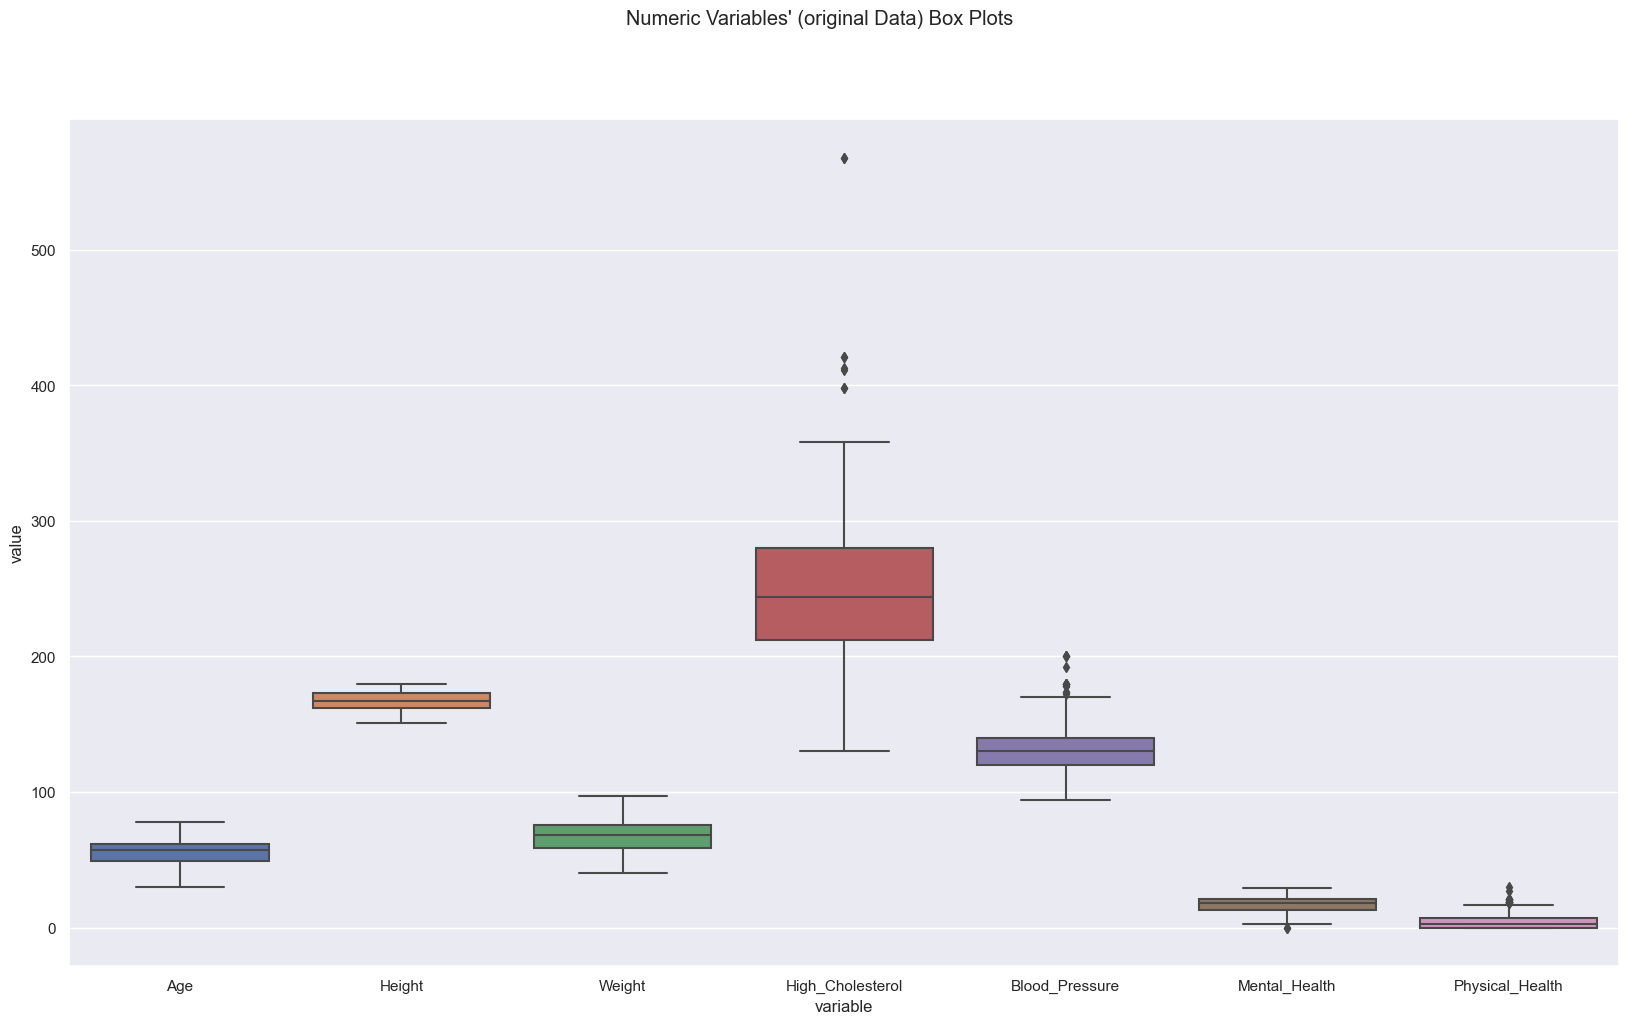

In [53]:
# All Numeric Variables' Box Plots
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(figsize=(20, 11))

# Plot data
sns.boxplot(x="variable", y="value", data=pd.melt(X_train[metric_features_]))

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' (original Data) Box Plots"

plt.suptitle(title)

plt.savefig(os.path.join(figures_path, 'numeric_variables_original_data_boxplots.png'), dpi=200)
plt.show()

__Normalized Data__

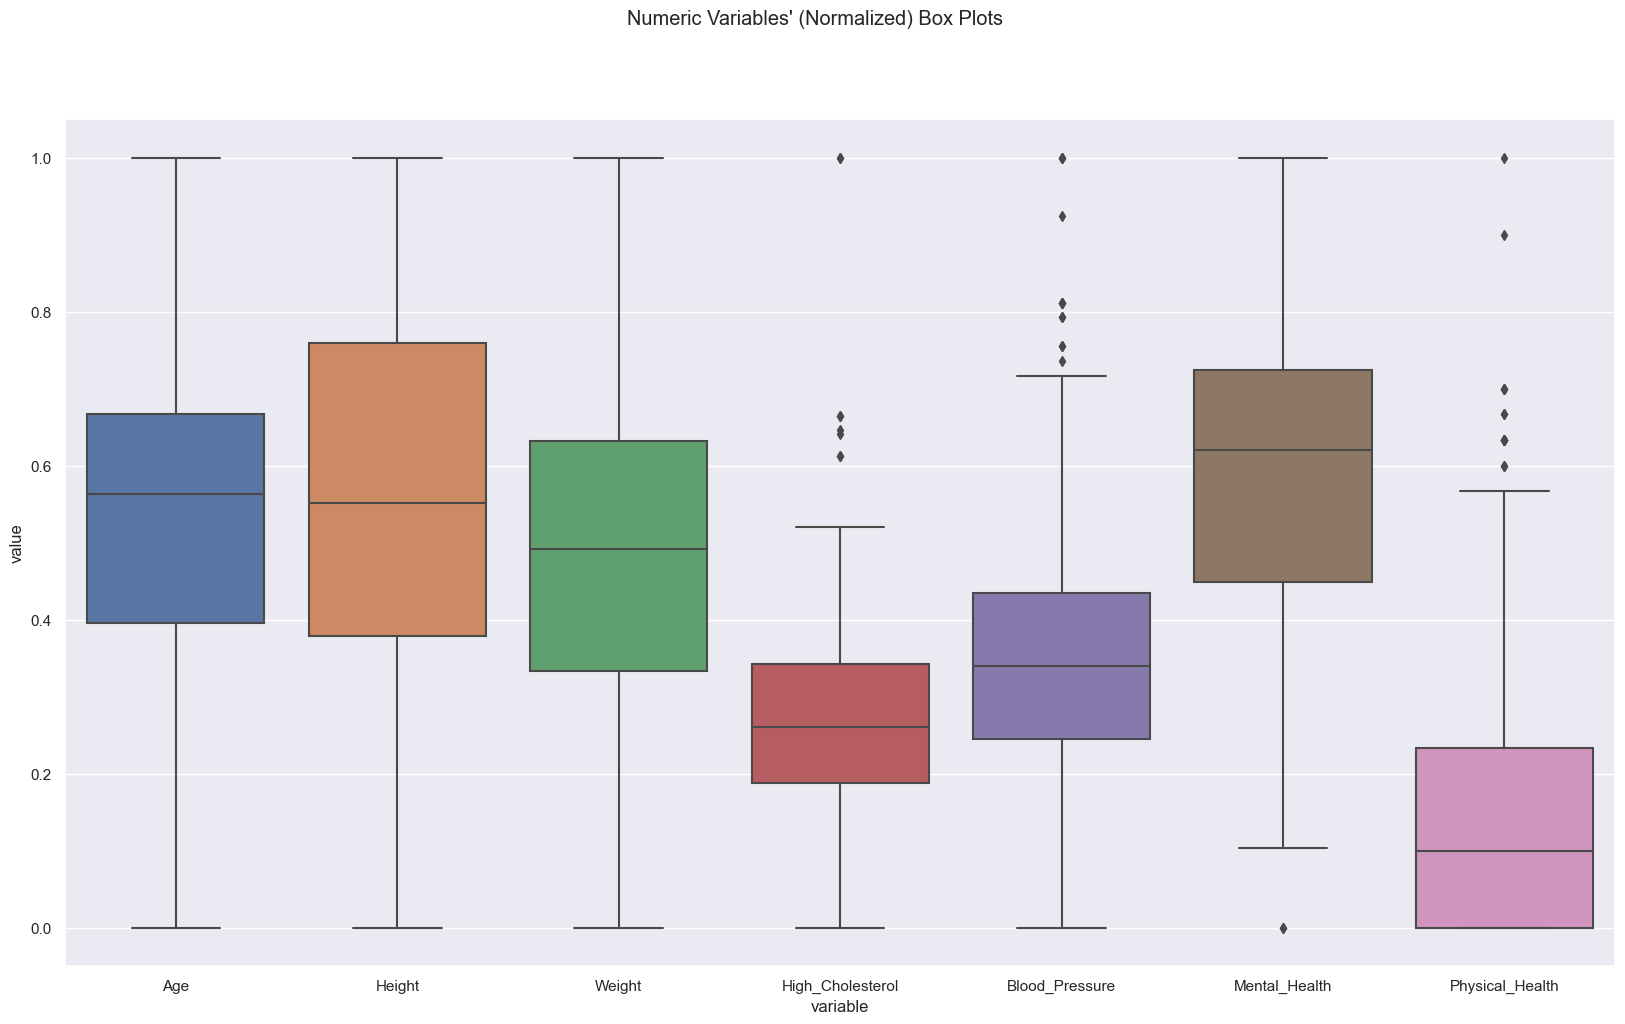

In [54]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
plt.subplots(figsize=(20, 11))

# Plot data
sns.boxplot(x="variable", y="value", data=pd.melt(X_train_norm_scaled))

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' (Normalized) Box Plots"

plt.suptitle(title)

plt.savefig(os.path.join(figures_path, 'numeric_variables_normalized_data_boxplots.png'), dpi=200)
plt.show()

__Standardized Data__

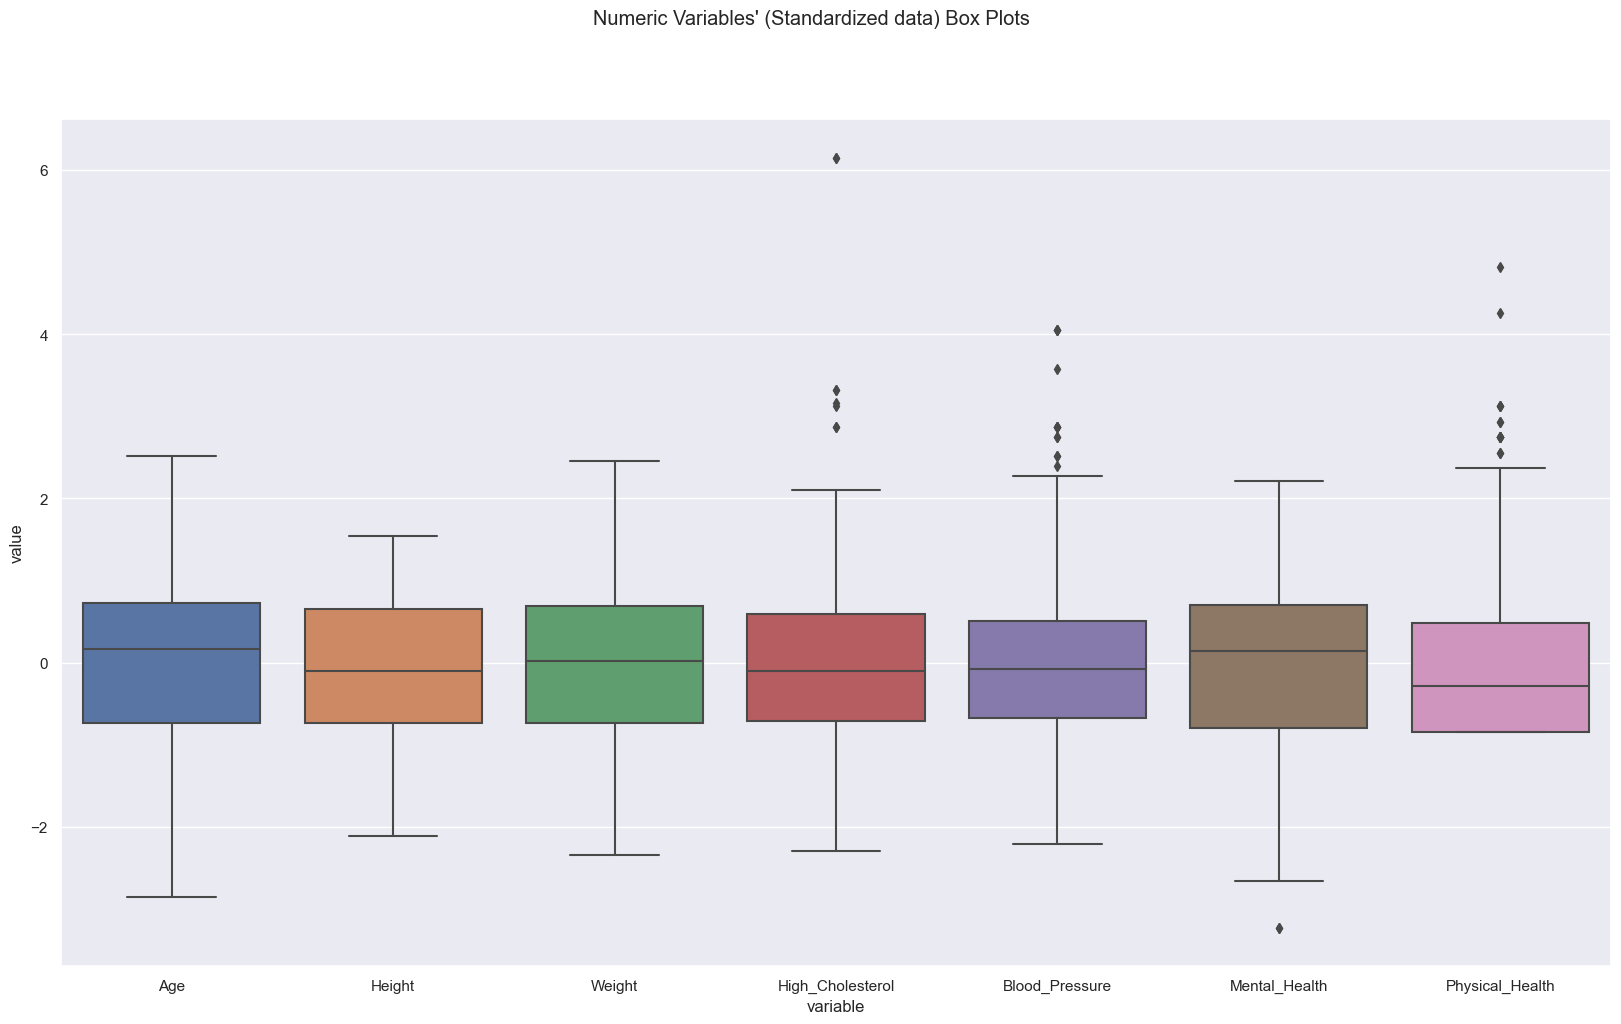

In [55]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
plt.subplots(figsize=(20, 11))

# Plot data
sns.boxplot(x="variable", y="value", data=pd.melt(X_train_stand_scaled))

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' (Standardized data) Box Plots"

plt.suptitle(title)

plt.savefig(os.path.join(figures_path, 'numeric_variables_standarized_boxplots.png'), dpi=200)
plt.show()

We can notice how scaling the features brings everything into perspective. The features are now more comparable and will have a similar effect on the learning models.

In [56]:
X_train_num_scaled = X_train_stand_scaled
X_val_num_scaled = X_val_stand_scaled
X_test_num_scaled = X_test_stand_scaled
X_train_num_scaled.head()

,Age,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
PatientID,,,,,,,
1660,0.726339,-0.728653,-0.236051,-1.525537,0.389316,-0.977369,2.366226
1767,1.509534,-0.098769,-0.908217,-1.004893,0.743104,-0.228110,2.177326
1921,0.390684,0.405137,0.268073,-0.522814,0.861033,-1.913944,0.855023
1497,0.278799,-0.728653,0.184053,-0.252851,1.332750,0.708465,-0.845081
1510,-0.056856,-0.224746,0.856219,0.827005,0.035529,0.521150,-0.845081


In [57]:
train_num_scaled = X_train_num_scaled.join(y_train)
val_num_scaled = X_val_num_scaled.join(y_val)
test_num_scaled = X_test_num_scaled
train_num_scaled.head()

,Age,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Disease
PatientID,,,,,,,,
1660,0.726339,-0.728653,-0.236051,-1.525537,0.389316,-0.977369,2.366226,0
1767,1.509534,-0.098769,-0.908217,-1.004893,0.743104,-0.228110,2.177326,0
1921,0.390684,0.405137,0.268073,-0.522814,0.861033,-1.913944,0.855023,0
1497,0.278799,-0.728653,0.184053,-0.252851,1.332750,0.708465,-0.845081,0
1510,-0.056856,-0.224746,0.856219,0.827005,0.035529,0.521150,-0.845081,1


__3.5__ Categorical Encoding

Encoding categorical data is a process of converting categorical data into integer format so that the data with converted categorical values can be provided to the models to give and improve the predictions.

__ReDefine Metric/Non-Metric Features__

In [58]:
# Define ordinal / nominal categorical features
non_metric_ordinal_features = ['Blood_Pressure_grp', 'High_Cholesterol_grp']
non_metric_nominal_features = [e for e in non_metric_features_ if e not in non_metric_ordinal_features]
#non_metric_features_ = non_metric_ordinal_features + non_metric_nominal_features

non_metric_features_

['Region',
 'Education',
 'Checkup',
 'Diabetes',
 'Smoking_Habit',
 'Drinking_Habit',
 'Exercise',
 'Fruit_Habit',
 'Water_Habit']

In [59]:
# Copy train & val df into encoding df
train_enc_df = X_train[non_metric_ordinal_features+non_metric_nominal_features].copy()
val_enc_df = X_val[non_metric_ordinal_features+non_metric_nominal_features].copy()
test_enc_df = X_test[non_metric_ordinal_features+non_metric_nominal_features].copy()

In [60]:
# Replace Checkup = Not Sure with mode value
train_enc_df.loc[train_enc_df['Checkup'] == 'Not sure', 'Checkup'] = train_enc_df['Checkup'].mode()[0]
val_enc_df.loc[val_enc_df['Checkup'] == 'Not sure', 'Checkup'] = val_enc_df['Checkup'].mode()[0]
test_enc_df.loc[test_enc_df['Checkup'] == 'Not sure', 'Checkup'] = test_enc_df['Checkup'].mode()[0]

__Ordinal Encoding__

In [61]:
train_oenc_df = train_enc_df[['Blood_Pressure_grp', 'High_Cholesterol_grp']].copy()
val_oenc_df = val_enc_df[['Blood_Pressure_grp', 'High_Cholesterol_grp']].copy()
test_oenc_df = test_enc_df[['Blood_Pressure_grp', 'High_Cholesterol_grp']].copy()

train_oenc_df.head()

,Blood_Pressure_grp,High_Cholesterol_grp
PatientID,,
1660,Grade3,Borderline_High
1767,Grade3,Borderline_High
1921,Grade3,High
1497,Grade3,High
1510,Grade3,High


In [62]:
# Blood Pressure unique grades
train_oenc_df['Blood_Pressure_grp'].unique()

array(['Grade3', 'Grade2', 'Grade1'], dtype=object)

__Blood_Pressure_grp__

In [63]:
# define data
bp_grades = ['Grade1', 'Grade2', 'Grade3']
# define ordinal encoding
oenc = OrdinalEncoder(categories=[bp_grades])
# transform data
train_oenc_df['Blood_Pressure_grp'] = oenc.fit_transform(train_oenc_df[['Blood_Pressure_grp']])
val_oenc_df['Blood_Pressure_grp'] = oenc.transform(val_oenc_df[['Blood_Pressure_grp']])
test_oenc_df['Blood_Pressure_grp'] = oenc.transform(test_oenc_df[['Blood_Pressure_grp']])

__High_Cholesterol_grp__

In [64]:
# define data
hc_grades = ['Normal', 'Borderline_High', 'High', 'Very_High']
# define ordinal encoding
oenc = OrdinalEncoder(categories=[hc_grades])
# transform data
train_oenc_df['High_Cholesterol_grp'] = oenc.fit_transform(train_oenc_df[['High_Cholesterol_grp']])
val_oenc_df['High_Cholesterol_grp'] = oenc.transform(val_oenc_df[['High_Cholesterol_grp']])
test_oenc_df['High_Cholesterol_grp'] = oenc.transform(test_oenc_df[['High_Cholesterol_grp']])

In [65]:
# Reassigning df to contain ohc variables
train_enc_df = pd.concat([train_enc_df.drop(columns=non_metric_ordinal_features), train_oenc_df], axis=1).set_index(X_train.index)
val_enc_df = pd.concat([val_enc_df.drop(columns=non_metric_ordinal_features), val_oenc_df], axis=1).set_index(X_val.index)
test_enc_df = pd.concat([test_enc_df.drop(columns=non_metric_ordinal_features), test_oenc_df], axis=1).set_index(X_test.index)
train_enc_df.head()

,Region,Education,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Blood_Pressure_grp,High_Cholesterol_grp
PatientID,,,,,,,,,,,
1660,South East,Elementary School (1st to 9th grade),More than 3 years,Neither I nor my immediate family have diabetes.,False,I consider myself a social drinker,True,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,2.0,1.0
1767,East of England,University Complete (3 or more years),More than 3 years,Neither I nor my immediate family have diabetes.,True,I usually consume alcohol every day,False,3 to 4 pieces of fruit in average,Less than half a liter,2.0,1.0
1921,London,Elementary School (1st to 9th grade),More than 3 years,Neither I nor my immediate family have diabetes.,False,I usually consume alcohol every day,False,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,2.0,2.0
1497,London,High School Graduate,More than 3 years,I do have diabetes,False,I consider myself a social drinker,False,1 to 2 pieces of fruit in average,Between one liter and two liters,2.0,2.0
1510,Yorkshire and the Humber,High School Incomplete (10th to 11th grade),More than 3 years,I do have diabetes,True,I consider myself a social drinker,True,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,2.0,2.0


__One-Hot Encoding__

It creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.

In [66]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame
ohc = OneHotEncoder(sparse=False)
train_ohenc_feat = ohc.fit_transform(train_enc_df[non_metric_nominal_features])
train_ohenc_feat_names = ohc.get_feature_names_out()
train_ohenc_df = pd.DataFrame(train_ohenc_feat, index=train_enc_df.index, columns=train_ohenc_feat_names).set_index(X_train.index)
train_ohenc_df.head()

,Region_East Midlands,Region_East of England,Region_London,Region_North East,Region_North West,Region_South East,Region_South West,Region_West Midlands,Region_Yorkshire and the Humber,Education_Elementary School (1st to 9th grade),...,Exercise_False,Exercise_True,Fruit_Habit_1 to 2 pieces of fruit in average,Fruit_Habit_3 to 4 pieces of fruit in average,Fruit_Habit_5 to 6 pieces of fruit in average,Fruit_Habit_Less than 1. I do not consume fruits every day.,Fruit_Habit_More than six pieces of fruit,Water_Habit_Between one liter and two liters,Water_Habit_Less than half a liter,Water_Habit_More than half a liter but less than one liter
PatientID,,,,,,,,,,,,,,,,,,,,,
1660,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1767,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1921,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1497,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [67]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame
val_ohenc_feat = ohc.transform(val_enc_df[non_metric_nominal_features])
val_ohenc_feat_names = ohc.get_feature_names_out()
val_ohenc_df = pd.DataFrame(val_ohenc_feat, index=val_enc_df.index, columns=val_ohenc_feat_names).set_index(X_val.index)

In [68]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame
test_ohenc_feat = ohc.transform(test_enc_df[non_metric_nominal_features])
test_ohenc_feat_names = ohc.get_feature_names_out()
test_ohenc_df = pd.DataFrame(test_ohenc_feat, index=test_enc_df.index, columns=test_ohenc_feat_names).set_index(X_test.index)

__Challenges of One-Hot Encoding__: `Dummy Variable Trap`

One-Hot Encoding results in a Dummy Variable Trap as the outcome of one variable can easily be predicted with the help of the remaining variables.

Dummy Variable Trap is a scenario in which variables are highly correlated to each other.

The Dummy Variable Trap leads to the problem known as multi-collinearity. Multi-collinearity occurs where there is a dependency between the independent features. Multi-collinearity is a serious issue in machine learning models like Linear Regression and Logistic Regression.

In [69]:
# Reassigning df to contain ohc variables
train_enc_df = pd.concat([train_enc_df.drop(columns=non_metric_nominal_features), train_ohenc_df], axis=1).set_index(X_train.index)
val_enc_df = pd.concat([val_enc_df.drop(columns=non_metric_nominal_features), val_ohenc_df], axis=1).set_index(X_val.index)
test_enc_df = pd.concat([test_enc_df.drop(columns=non_metric_nominal_features), test_ohenc_df], axis=1).set_index(X_test.index)
train_enc_df.head()

,Blood_Pressure_grp,High_Cholesterol_grp,Region_East Midlands,Region_East of England,Region_London,Region_North East,Region_North West,Region_South East,Region_South West,Region_West Midlands,...,Exercise_False,Exercise_True,Fruit_Habit_1 to 2 pieces of fruit in average,Fruit_Habit_3 to 4 pieces of fruit in average,Fruit_Habit_5 to 6 pieces of fruit in average,Fruit_Habit_Less than 1. I do not consume fruits every day.,Fruit_Habit_More than six pieces of fruit,Water_Habit_Between one liter and two liters,Water_Habit_Less than half a liter,Water_Habit_More than half a liter but less than one liter
PatientID,,,,,,,,,,,,,,,,,,,,,
1660,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1767,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1921,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1497,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1510,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<div class="alert alert-block alert-info">
<a class="anchor" id="feature-selection">

### 3. Feature Selection
</a>
</div>

__Feature Selection__ is the method of reducing the input variable to your model by using only relevant data and getting rid of noise in data.

__Filter Methods:__ Spearman Correlation & Pearson Correlation

In [70]:
cor_spearman = train_num_scaled.corr(method ='spearman')
cor_spearman

,Age,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Disease
Age,1.000000,-0.048365,-0.142203,0.183139,0.293391,-0.374445,0.250971,-0.214291
Height,-0.048365,1.000000,0.468585,-0.043930,-0.005112,-0.055917,0.033302,-0.156764
Weight,-0.142203,0.468585,1.000000,-0.033824,-0.066810,0.324459,-0.432129,0.187946
High_Cholesterol,0.183139,-0.043930,-0.033824,1.000000,0.154127,-0.016749,0.044082,-0.108453
Blood_Pressure,0.293391,-0.005112,-0.066810,0.154127,1.000000,-0.034763,0.145341,-0.141017
Mental_Health,-0.374445,-0.055917,0.324459,-0.016749,-0.034763,1.000000,-0.398831,0.441050
Physical_Health,0.250971,0.033302,-0.432129,0.044082,0.145341,-0.398831,1.000000,-0.403479
Disease,-0.214291,-0.156764,0.187946,-0.108453,-0.141017,0.441050,-0.403479,1.000000


In [71]:
def heatmap_corr(cor, corr_method):
    p_corr = cor.iloc[1:,:-1].copy()
    # Setting up a diverging palette
    plt.subplots(figsize=(12,6))
    # Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
    sns.heatmap(p_corr, vmin = -1, vmax = 1, cmap = plt.cm.Reds, annot=True)
    plt.title(corr_method)
    plt.savefig(os.path.join(figures_path, 'numeric_variables_'+corr_method.replace(" ", "_")+'_heatmap.png'), dpi=200)
    plt.show()

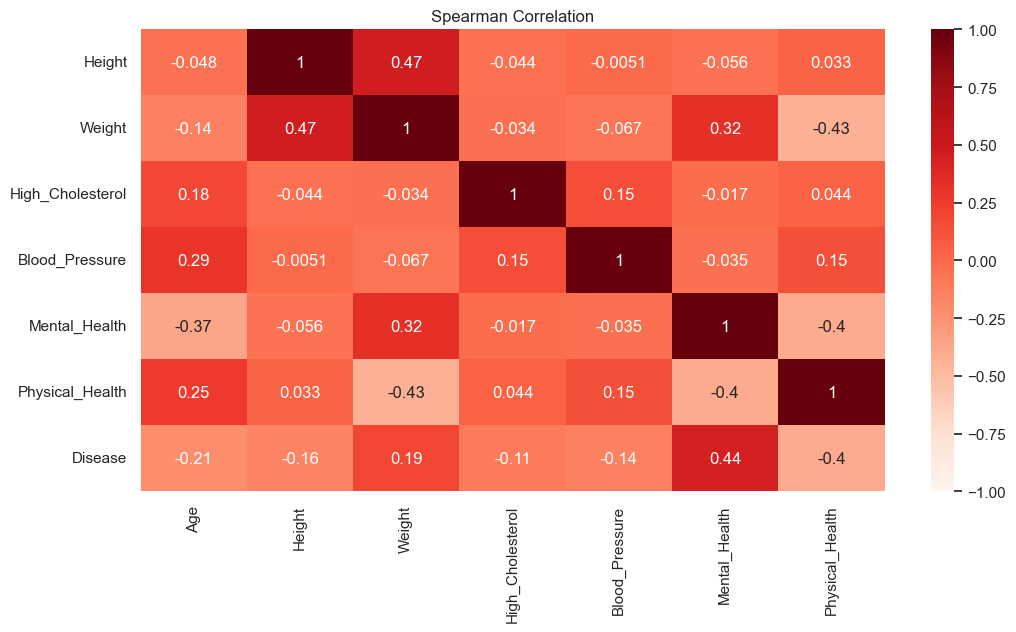

In [72]:
heatmap_corr(cor_spearman, "Spearman Correlation")

In [73]:
cor_pearson = train_num_scaled.corr(method ='pearson')
cor_pearson

,Age,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Disease
Age,1.000000,-0.057365,-0.147879,0.206272,0.280506,-0.385492,0.190652,-0.200034
Height,-0.057365,1.000000,0.496986,-0.069070,-0.012668,-0.057862,0.036295,-0.180095
Weight,-0.147879,0.496986,1.000000,-0.040523,-0.099897,0.289627,-0.406648,0.174566
High_Cholesterol,0.206272,-0.069070,-0.040523,1.000000,0.140831,0.009312,0.054108,-0.074015
Blood_Pressure,0.280506,-0.012668,-0.099897,0.140831,1.000000,-0.047601,0.185296,-0.168494
Mental_Health,-0.385492,-0.057862,0.289627,0.009312,-0.047601,1.000000,-0.311959,0.431369
Physical_Health,0.190652,0.036295,-0.406648,0.054108,0.185296,-0.311959,1.000000,-0.411269
Disease,-0.200034,-0.180095,0.174566,-0.074015,-0.168494,0.431369,-0.411269,1.000000


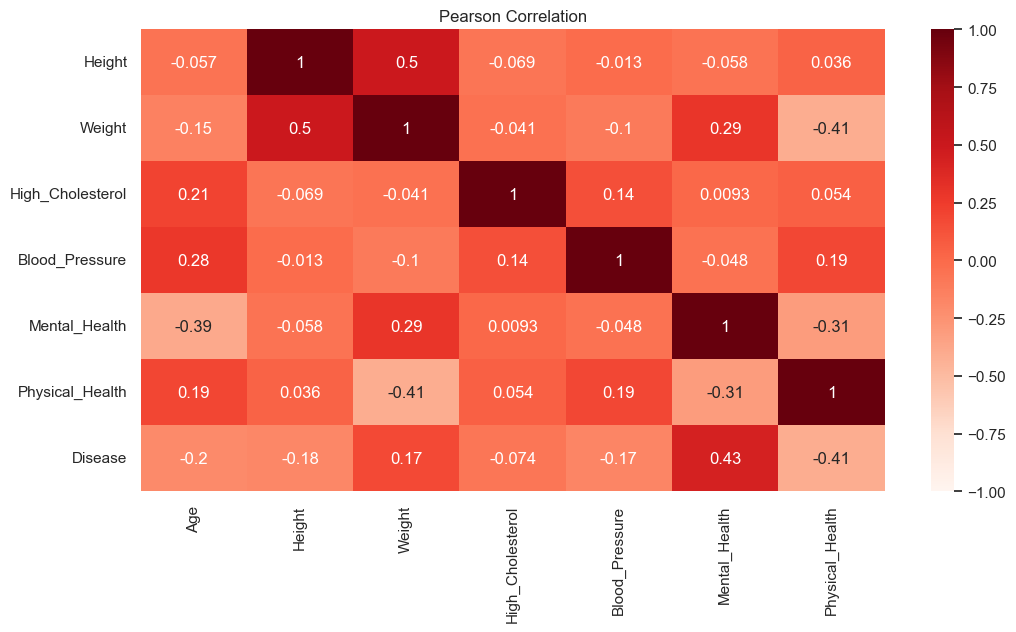

In [74]:
heatmap_corr(cor_pearson, "Pearson Correlation")

We can conclude that:
- There is no independent variable highly correlated with the target. We need to use other feature selection techniques to get more insights.

__Wrapper Methods:__ __RPE__

This time we are going to apply Recursive Feature Elimination (RFE / Backwards) that will allow to select the most important features to keep. The base estimator used will be a Logistic Regression.

As we don't know apriori the number of features to select we can create a loop to check the score of the estimator using a different number of features.

In [75]:
nof, high_score = rpe_optimum_features_num(X_train_num_scaled, y_train, X_val_num_scaled, y_val)

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 3
Score with 3 features: 0.751055


In [76]:
lr_model = LogisticRegression()
rfe = RFE(estimator = lr_model, n_features_to_select = 3)
X_rfe = rfe.fit_transform(X = X_train_num_scaled , y = y_train)
rfe_check = pd.Series(rfe.support_, index = X_train_num_scaled.columns)

Check the variables ranking by RFE as the most "important" ones by calling the attribute `ranking_` to `rfe`.

In [77]:
rfe_ranking = pd.Series(rfe.ranking_, index = X_train_num_scaled.columns)
rfe_ranking

Age                 5
Height              1
Weight              4
High_Cholesterol    3
Blood_Pressure      2
Mental_Health       1
Physical_Health     1
dtype: int64

In [78]:
rfe_features = rfe_check[rfe_check == True].index.tolist()
rfe_features

['Height', 'Mental_Health', 'Physical_Health']

__Embedded Methods:__ __Lasso Regression__

In [79]:
reg = LassoCV()
reg.fit(train_num_scaled[metric_features_], y_train)
coef = pd.Series(reg.coef_, index = train_num_scaled[metric_features_].columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 6 variables and eliminated the other 1 variables


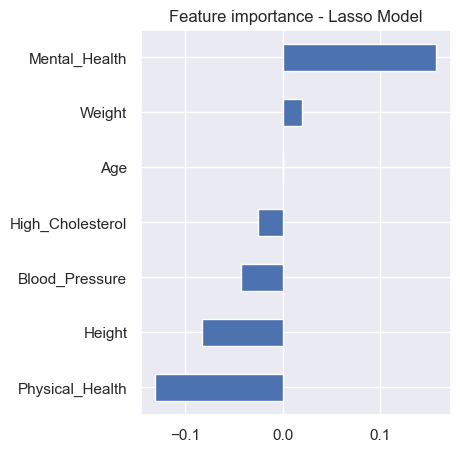

In [80]:
def plot_importance(coef, model):
    coef_ = coef.sort_values()
    plt.figure(figsize=(4,5))
    coef_.plot(kind = "barh")
    plt.title("Feature importance - "+ model +" Model")
    plt.savefig(os.path.join(figures_path, 'numeric_variables_'+model.replace(" ", "_")+'barplot_.png'), dpi=200)
    plt.show()
plot_importance(coef,'Lasso')

__Decision Tree Feature Importance__

In [81]:
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(train_num_scaled[metric_features_], y_train)
# Get numerical feature importance
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(metric_features_, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: Mental_Health        Importance: 0.23
Variable: Age                  Importance: 0.2
Variable: Blood_Pressure       Importance: 0.16
Variable: Weight               Importance: 0.14
Variable: Physical_Health      Importance: 0.13
Variable: Height               Importance: 0.08
Variable: High_Cholesterol     Importance: 0.07


[None, None, None, None, None, None, None]

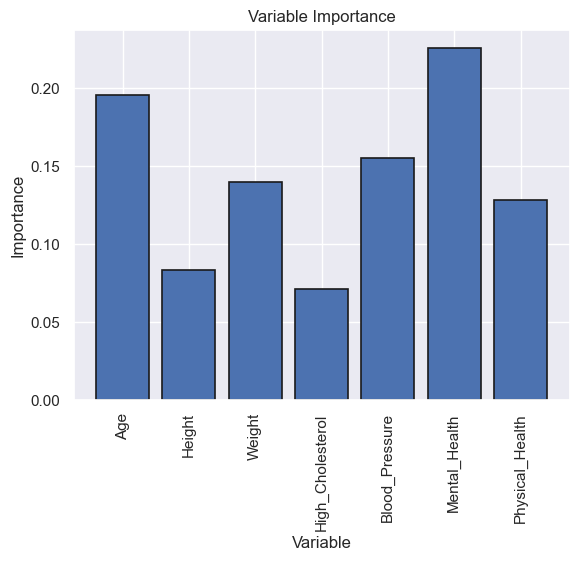

In [82]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x-axis
plt.xticks(x_values, metric_features_, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable'); plt.title('Variable Importance')

plt.savefig(os.path.join(figures_path, 'numeric_variables_DT_Importance_barchart_.png'), dpi=200)
plt.show()

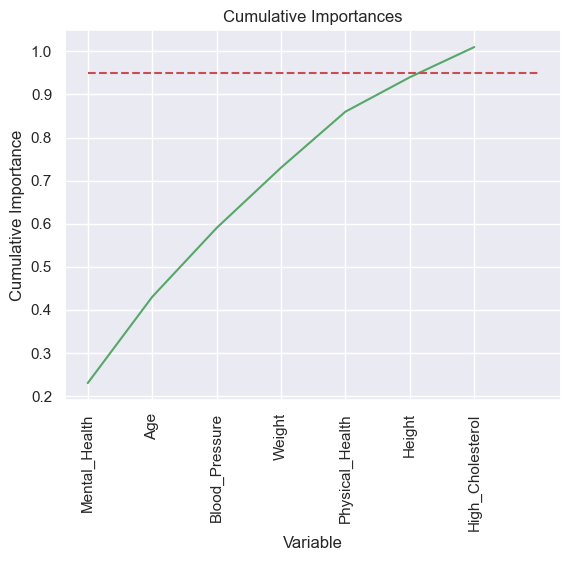

In [83]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

### Numerical Data

| Predictor        | Spearman&Pearson | RFE     | LASSO   | DT      | What to do? (One possible way to "solve") |
|------------------|------------------|---------|---------|---------|-------------------------------------------|
| Age              | Discard          | Discard | Discard | Keep    | Discard                                   |
| Height           | Discard          | Keep    | Keep    | Keep    | Try with / without                        |
| Weight           | Discard          | Discard | Keep    | Keep    | Discard                                   |
| High_Cholesterol | Discard          | Discard | Keep ?  | Discard | Discard                                   |
| Blood_Pressure   | Discard          | Discard | Keep    | Keep    | Try with / without                        |
| Mental_Health    | Keep ?           | Keep    | Keep    | Keep    | Include in the model                      |
| Physical_Health  | Keep ?           | Keep    | Keep    | Keep    | Include in the model                      |

In [84]:
selected_num_features = ['Mental_Health', 'Physical_Health', 'Age', 'Blood_Pressure']

__`4.2`__ __Feature Selection for Categorical values__

__Chi-Square__

The Chi-Square test of independence is used to determine if there is a significant relationship between two categorical (nominal) variables. It means the Chi-Square Test of Independence is a hypothesis testing with 2 hypotheses present; the Null Hypothesis and the Alternative Hypothesis.

__`Null Hypothesis (H0)`__: There is no relationship between the variables
__`Alternative Hypothesis (H1)`__: There is a relationship between variables

In [85]:
def TestIndependence(X, y, alpha = 0.05):
    df_observed = pd.crosstab(y, X)
    check, p, dof, expected = stats.chi2_contingency(df_observed.values)
    df_expected = pd.DataFrame(expected, columns=df_observed.columns, index = df_observed.index)
    if p < alpha:
        result = "Reject Null Hypothesis"
    else:
        result = "Fail to Reject Null Hypothesis (no relationship with output)"
    return result

In [86]:
chi2_check_vars = {}
for var in non_metric_nominal_features:
    res = TestIndependence(X_train[var], y_train)
    chi2_check_vars[var] = res
chi2_vars_check = pd.Series(chi2_check_vars)
chi2_vars_check

Region            Fail to Reject Null Hypothesis (no relationshi...
Education                                    Reject Null Hypothesis
Checkup                                      Reject Null Hypothesis
Diabetes                                     Reject Null Hypothesis
Smoking_Habit     Fail to Reject Null Hypothesis (no relationshi...
Drinking_Habit                               Reject Null Hypothesis
Exercise                                     Reject Null Hypothesis
Fruit_Habit                                  Reject Null Hypothesis
Water_Habit       Fail to Reject Null Hypothesis (no relationshi...
dtype: object

In [87]:
selected_cat = chi2_vars_check[chi2_vars_check == "Reject Null Hypothesis"].index.tolist()
selected_cat

['Education',
 'Checkup',
 'Diabetes',
 'Drinking_Habit',
 'Exercise',
 'Fruit_Habit']

__Final Insights__

### Categorical Data

| Predictor | Chi-Square |
| --- |------------|
| Region | Discard       |
| Education | Keep       |
| Checkup | Keep       |
| Diabetes | Keep       |
| Smoking_Habit | Discard       |
| Drinking_Habit | Keep       |
| Exercise | Keep       |
| Fruit_Habit | Keep       |
| Water_Habit | Discard       |

__Post Hoc Testing__

The Chi-square test of independence is an omnibus test which means it tests the data as a whole. If we have multiple classes within a category, we would not be able to easily tell which class of the features are responsible for the relationship. To conduct multiple 2×2 Chi-square test of independence, we need to regroup the features for each test to where it is one category class against the rest.

We can apply `OneHotEncoding` to each class and create a new cross-tab table against the other feature.

Comparing multiple classes against each other means that the error rate of a false positive compound with each test.
This means that our Chi-square test would have a quite high error rate.

__`Bonferroni-adjusted method`__ for correcting the p-value we use. We adjust our P-value by the number of pairwise comparisons we want to do. The formula is __p/N__, where __p= the p-value of the original test and N= the number of planned pairwise comparisons__.

In [88]:
train_enc_df.head()

,Blood_Pressure_grp,High_Cholesterol_grp,Region_East Midlands,Region_East of England,Region_London,Region_North East,Region_North West,Region_South East,Region_South West,Region_West Midlands,...,Exercise_False,Exercise_True,Fruit_Habit_1 to 2 pieces of fruit in average,Fruit_Habit_3 to 4 pieces of fruit in average,Fruit_Habit_5 to 6 pieces of fruit in average,Fruit_Habit_Less than 1. I do not consume fruits every day.,Fruit_Habit_More than six pieces of fruit,Water_Habit_Between one liter and two liters,Water_Habit_Less than half a liter,Water_Habit_More than half a liter but less than one liter
PatientID,,,,,,,,,,,,,,,,,,,,,
1660,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1767,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1921,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1497,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1510,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [89]:
chi2_classes_check = {}
for var in non_metric_nominal_features:
    alpha = 0.05/X_train[var].nunique()
    for var_class in X_train[var].unique():
        class_name = var + "_" + str(var_class)
        if class_name in train_ohenc_df.columns:
            res = TestIndependence(train_enc_df[class_name], y_train, alpha)
            chi2_classes_check[class_name] = res

chi2_classes_check = pd.Series(chi2_classes_check)
chi2_classes_check

Region_South East                                                                      Fail to Reject Null Hypothesis (no relationshi...
Region_East of England                                                                 Fail to Reject Null Hypothesis (no relationshi...
Region_London                                                                          Fail to Reject Null Hypothesis (no relationshi...
Region_Yorkshire and the Humber                                                        Fail to Reject Null Hypothesis (no relationshi...
Region_East Midlands                                                                   Fail to Reject Null Hypothesis (no relationshi...
Region_South West                                                                      Fail to Reject Null Hypothesis (no relationshi...
Region_West Midlands                                                                   Fail to Reject Null Hypothesis (no relationshi...
Region_North East                        

In [90]:
selected_cat_features = chi2_classes_check[chi2_classes_check == "Reject Null Hypothesis"].index.tolist()
selected_cat_features.append('Blood_Pressure_grp')
#selected_cat_features.append('High_Cholesterol_grp')
selected_cat_features

['Education_Elementary School (1st to 9th grade)',
 'Checkup_More than 3 years',
 'Checkup_Less than 3 years but more than 1 year',
 'Diabetes_Neither I nor my immediate family have diabetes.',
 'Diabetes_I do have diabetes',
 'Diabetes_I have/had pregnancy diabetes or borderline diabetes',
 'Drinking_Habit_I consider myself a social drinker',
 'Drinking_Habit_I usually consume alcohol every day',
 'Exercise_True',
 'Exercise_False',
 'Fruit_Habit_1 to 2 pieces of fruit in average',
 'Fruit_Habit_3 to 4 pieces of fruit in average',
 'Fruit_Habit_Less than 1. I do not consume fruits every day.',
 'Fruit_Habit_5 to 6 pieces of fruit in average',
 'Blood_Pressure_grp']

In [91]:
train_enc_df[selected_cat_features].head()

,Education_Elementary School (1st to 9th grade),Checkup_More than 3 years,Checkup_Less than 3 years but more than 1 year,Diabetes_Neither I nor my immediate family have diabetes.,Diabetes_I do have diabetes,Diabetes_I have/had pregnancy diabetes or borderline diabetes,Drinking_Habit_I consider myself a social drinker,Drinking_Habit_I usually consume alcohol every day,Exercise_True,Exercise_False,Fruit_Habit_1 to 2 pieces of fruit in average,Fruit_Habit_3 to 4 pieces of fruit in average,Fruit_Habit_Less than 1. I do not consume fruits every day.,Fruit_Habit_5 to 6 pieces of fruit in average,Blood_Pressure_grp
PatientID,,,,,,,,,,,,,,,
1660,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
1767,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
1921,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0
1497,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0
1510,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0


In [92]:
X_train.head()

,Region,Age,Education,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Blood_Pressure_grp,High_Cholesterol_grp
PatientID,,,,,,,,,,,,,,,,,,
1660,South East,62,Elementary School (1st to 9th grade),162,65,170,138,12,17,More than 3 years,Neither I nor my immediate family have diabetes.,False,I consider myself a social drinker,True,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,Grade3,Borderline_High
1767,East of England,69,University Complete (3 or more years),167,57,197,144,16,16,Not sure,Neither I nor my immediate family have diabetes.,True,I usually consume alcohol every day,False,3 to 4 pieces of fruit in average,Less than half a liter,Grade3,Borderline_High
1921,London,59,Elementary School (1st to 9th grade),171,71,222,146,7,9,Not sure,Neither I nor my immediate family have diabetes.,False,I usually consume alcohol every day,False,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,Grade3,High
1497,London,58,High School Graduate,162,70,236,154,21,0,More than 3 years,I do have diabetes,False,I consider myself a social drinker,False,1 to 2 pieces of fruit in average,Between one liter and two liters,Grade3,High
1510,Yorkshire and the Humber,55,High School Incomplete (10th to 11th grade),166,78,292,132,20,0,More than 3 years,I do have diabetes,True,I consider myself a social drinker,True,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,Grade3,High


In [93]:
X_train_scaled = train_num_scaled[selected_num_features].join(train_enc_df[selected_cat_features])
X_val_scaled = val_num_scaled[selected_num_features].join(val_enc_df[selected_cat_features])
X_test_scaled = test_num_scaled[selected_num_features].join(test_enc_df[selected_cat_features])
X_train_scaled

,Mental_Health,Physical_Health,Age,Blood_Pressure,Education_Elementary School (1st to 9th grade),Checkup_More than 3 years,Checkup_Less than 3 years but more than 1 year,Diabetes_Neither I nor my immediate family have diabetes.,Diabetes_I do have diabetes,Diabetes_I have/had pregnancy diabetes or borderline diabetes,Drinking_Habit_I consider myself a social drinker,Drinking_Habit_I usually consume alcohol every day,Exercise_True,Exercise_False,Fruit_Habit_1 to 2 pieces of fruit in average,Fruit_Habit_3 to 4 pieces of fruit in average,Fruit_Habit_Less than 1. I do not consume fruits every day.,Fruit_Habit_5 to 6 pieces of fruit in average,Blood_Pressure_grp
PatientID,,,,,,,,,,,,,,,,,,,
1660,-0.977369,2.366226,0.726339,0.389316,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
1767,-0.228110,2.177326,1.509534,0.743104,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
1921,-1.913944,0.855023,0.390684,0.861033,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0
1497,0.708465,-0.845081,0.278799,1.332750,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0
1510,0.521150,-0.845081,-0.056856,0.035529,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,-1.351999,1.988425,-0.056856,-0.554117,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0
1383,-1.539314,-0.278380,0.390684,1.096891,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
1214,0.895780,-0.845081,-1.063821,-0.200330,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0


In [94]:
X_train_not_scaled = X_train[selected_num_features].join(train_enc_df[selected_cat_features])
X_val_not_scaled = X_val[selected_num_features].join(val_enc_df[selected_cat_features])
X_test_not_scaled = X_test[selected_num_features].join(test_enc_df[selected_cat_features])

<div class="alert alert-block alert-info">

<a class="anchor" id="modelling">

#### 4. Modelling
</a>
</div>



__Model Evaluation Metrics__

Model evaluation metrics define adaptive vs non-adaptive machine learning models tell us how well the model generalizes on the unseen data. By using different metrics for performance evaluation, we could improve the overall predictive power of our model.

__`Classification Metrics`__

The sklearn library offers a wide range of metrics for this situation. We are going to see the most used ones.

* The confusion matrix
* The accuracy Score
* The precision
* The recall
* The F1 Score

__Baseline Models Accuracy & Error__

A baseline prediction algorithm provides a set of predictions that can evaluate any predictions for the problem, such as classification accuracy or RMSE.

It serves as benchmarks for trained models

In [95]:
define_baseline_mode_accuracy(X_train_scaled, y_train, X_val_scaled, y_val)

Baseline Models Accuracy: 

Running DummyClassifier()
accuracy: 0.515 average_precision: 0.485 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.340
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.515 average_precision: 0.485 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.340

Running GaussianNB()
accuracy: 0.757 average_precision: 0.849 roc_auc: 0.864 recall_macro: 0.760 f1_macro: 0.754
=== new best GaussianNB() (using recall_macro):
accuracy: 0.757 average_precision: 0.849 roc_auc: 0.864 recall_macro: 0.760 f1_macro: 0.754

Running MultinomialNB()
accuracy: 0.789 average_precision: 0.891 roc_auc: 0.879 recall_macro: 0.788 f1_macro: 0.788
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.789 average_precision: 0.891 roc_auc: 0.879 recall_macro: 0.788 f1_macro: 0.788

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.750 average_precision: 0.676 roc_auc: 0.750 recall_macro: 0.750 f1_macro: 0.749
Running DecisionTreeClassifier(cl

__Models__

__`5.1`__  __k-nearest neighbors (KNN)__

k- Nearest Neighbors is one of the most basic algorithms used in supervised machine learning. It classifies new data points based on similarity index which is usually a distance metric. It is based on the concept of neighborhood, in which the neighbors are similar. Thus, it is possible to classify the elements of an n-dimensional space into K sets.

__`Model Fit`__

In [96]:
model_name = "k-nearest neighbors"
knn_model = KNeighborsClassifier()

# Fit the algorithm on the data
knn_model.fit(X_train_scaled, y_train)

# Predict training set:
y_train_pred = knn_model.predict(X_train_scaled)

# Predict on validation data
y_val_pred = knn_model.predict(X_val_scaled)

# Predict on test data
y_test_knn = knn_model.predict(X_test_scaled)

__Model Evaluation__

In [97]:
# Print model report:
generate_classification_report(y_val, y_val_pred)

_______________________Begin Classification Report______________________
Confusion Matrix: 
[[ 95  19]
 [ 21 102]]
Metrics Report: 
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       114
           1       0.84      0.83      0.84       123

    accuracy                           0.83       237
   macro avg       0.83      0.83      0.83       237
weighted avg       0.83      0.83      0.83       237

_______________________________END Report___________________________


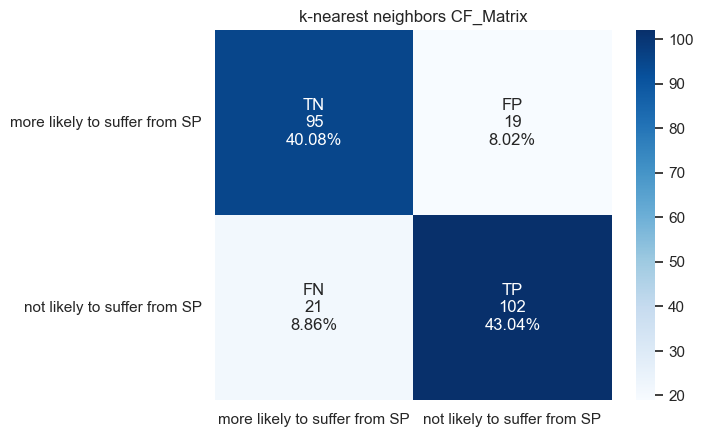

In [98]:
# Plot Confusion Matrix
generate_confusion_matrix(confusion_matrix(y_val, y_val_pred), model_name, figures_path)

In [99]:
# Perform cross-validation:
perform_cross_validation(knn_model, X_train_scaled, y_train)

CV Score : Mean - 0.9003 | Std - 0.02644 | Min - 0.8739 | Max - 0.9487


__Model Pre-Training Evaluation__

In [100]:
# Get model f1 score before training
knn_model_score = f1_score(y_val, y_val_pred)
print('F1 Score Pre-Training: ', "%.2f" % (knn_model_score*100))

F1 Score Pre-Training:  83.61


__Model Training__

One of the challenges in a k-NN algorithm is finding the best 'k' i.e. the number of neighbors to be used in the majority vote while deciding the class. Generally, it is advisable to test the accuracy of your model for different values of k and then select the best one from them.

In [101]:
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train_scaled,y_train)
    yhat= knn.predict(X_val_scaled)
    mean_acc[i-1] = metrics.accuracy_score(y_val, yhat)

mean_acc

array([0.96624473, 0.89029536, 0.87341772, 0.8649789 , 0.83122363,
       0.83122363, 0.82700422, 0.8185654 , 0.82278481, 0.80168776,
       0.82700422, 0.81012658, 0.81434599, 0.82700422, 0.81434599,
       0.80590717, 0.8185654 , 0.80168776, 0.8185654 , 0.83544304])

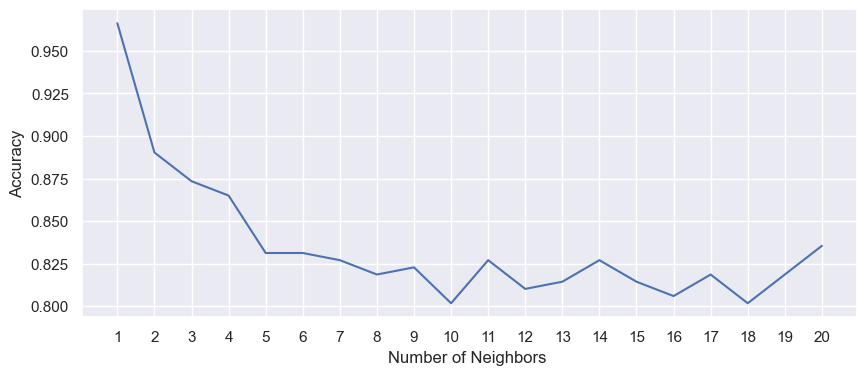

In [102]:
loc = np.arange(1, 21, step=1.0)
plt.figure(figsize = (10, 4))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [103]:
knn_model_params = {
    'algorithm': ['auto', 'brute','kd_tree'],
    'n_neighbors': [1, 2],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}
knn_grid, knn_val_grid_pred, knn_test_grid_pred = model_hyperparameter_tuning(knn_model, knn_model_params, X_train_scaled, y_train, X_val_scaled, X_test_scaled)

__Model Post-Training Evaluation__

In [104]:
knn_grid_score = f1_score(y_val, knn_val_grid_pred)
print('F1 Score Post-Training: ', "%.2f" % (knn_grid_score*100))
print('Improvement of {:0.2f}%.'.format( 100 * ((knn_grid_score - knn_model_score) / knn_model_score)))
print('Best Params: '+ str(knn_grid.best_params_))

F1 Score Post-Training:  96.30
Improvement of 15.18%.
Best Params: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


In [105]:
# export submission
if knn_model_score >= knn_grid_score:
    knn_f1_score = knn_model_score
    export_submission(model_name, X_test_scaled, y_test_knn, submission_path)
else:
    knn_f1_score = knn_grid_score
    export_submission(model_name, X_test_scaled, knn_test_grid_pred, submission_path)

__`5.2`__  __Logistic Regression__

Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a certain class. If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (positive class), or else it does not (negative class).

In [106]:
model_name = "Logistic Regression"
lr_model = LogisticRegression()

# Fit the algorithm on the data
lr_model.fit(X_train_scaled, y_train)

# Predict training set:
y_train_pred = lr_model.predict(X_train_scaled)

# Predict on validation data:
y_val_pred = lr_model.predict(X_val_scaled)

# Predict on test data
y_test_lr= lr_model.predict(X_test_scaled)

__Model Evaluation__

In [107]:
# Print model report:
generate_classification_report(y_val, y_val_pred)

_______________________Begin Classification Report______________________
Confusion Matrix: 
[[ 95  19]
 [ 14 109]]
Metrics Report: 
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       114
           1       0.85      0.89      0.87       123

    accuracy                           0.86       237
   macro avg       0.86      0.86      0.86       237
weighted avg       0.86      0.86      0.86       237

_______________________________END Report___________________________


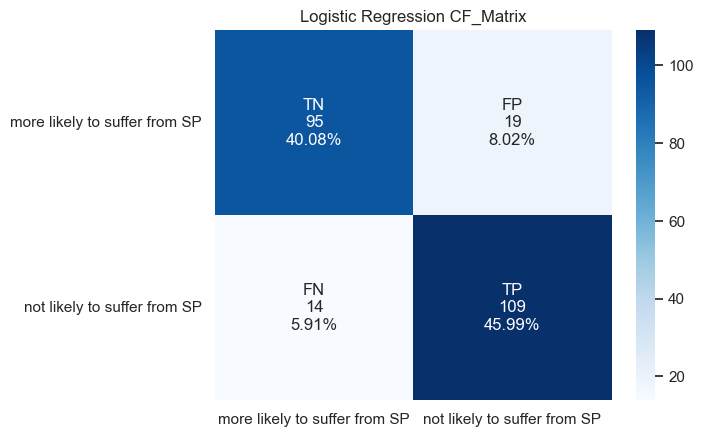

In [108]:
# Plot Confusion Matrix
generate_confusion_matrix(confusion_matrix(y_val, y_val_pred), model_name, figures_path)

In [109]:
# Perform cross-validation:
perform_cross_validation(lr_model, X_train_scaled, y_train)

CV Score : Mean - 0.9134 | Std - 0.02372 | Min - 0.8853 | Max - 0.9439


__Model Pre-Training Evaluation__

In [110]:
# Get model f1 score before training
lr_model_score = f1_score(y_val, y_val_pred)
print('LR: F1-Score Pre-Training: ', "%.2f" % (lr_model_score*100))

LR: F1-Score Pre-Training:  86.85


__Model Training__

Solvers (solver) can make differences in performance.
- `solver` in [`newton-cg`, `lbfgs`, `liblinear`, `sag`, `saga`]

Regularization (penalty) can sometimes be helpful.
- `penalty` in [`none`, `l1`, `l2`, `elasticnet`]

**not all solvers support all regularization terms.**

The C parameter controls the penality strength, which can also be effective.

- C in [100, 10, 1.0, 0.1, 0.01]

In [111]:
# model_hyperparameter_tuning
lr_model_params = {
    'solver': ['lbfgs', 'liblinear', 'newton-cg'],
    'penalty': ['l2'],
    'C':[0.1, 1.0, 10, 100],
    'max_iter':[1000]
}
lr_grid, lr_grid_pred, lr_test_grid_pred = model_hyperparameter_tuning(lr_model, lr_model_params, X_train_scaled, y_train, X_val_scaled, X_test_scaled)

__Model Post-Training Evaluation__

In [112]:
lr_grid_score = f1_score(y_val, lr_grid_pred)
print('LG: F1-Score Post-Training: ', "%.2f" % (lr_grid_score*100))
print('Improvement of {:0.2f}%.'.format( 100 * ((lr_grid_score - lr_model_score) / lr_model_score)))
print('Best Params: '+ str(lr_grid.best_params_))

LG: F1-Score Post-Training:  86.40
Improvement of -0.52%.
Best Params: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}


In [113]:
# export submission
if lr_model_score >= lr_grid_score:
    lr_f1_score = lr_model_score
    export_submission(model_name, X_test_scaled, y_test_lr, submission_path)
else:
    lr_f1_score = lr_grid_score
    export_submission(model_name, X_test_scaled, lr_test_grid_pred, submission_path)

__`5.3`__ __Support Vector Machine (SVM)__

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

In [114]:
model_name = "SVM"
SVM_model = svm.SVC()

# Fit the algorithm on the data
SVM_model.fit(X_train_scaled, y_train)

# Predict training set:
y_train_pred = SVM_model.predict(X_train_scaled)

# Predict on validation data:
y_val_pred = SVM_model.predict(X_val_scaled)

# Predict on test data
y_test_svm = SVM_model.predict(X_test_scaled)

__Model Evaluation__

In [115]:
# Print model report:
generate_classification_report(y_val, y_val_pred)

_______________________Begin Classification Report______________________
Confusion Matrix: 
[[ 95  19]
 [ 11 112]]
Metrics Report: 
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       114
           1       0.85      0.91      0.88       123

    accuracy                           0.87       237
   macro avg       0.88      0.87      0.87       237
weighted avg       0.87      0.87      0.87       237

_______________________________END Report___________________________


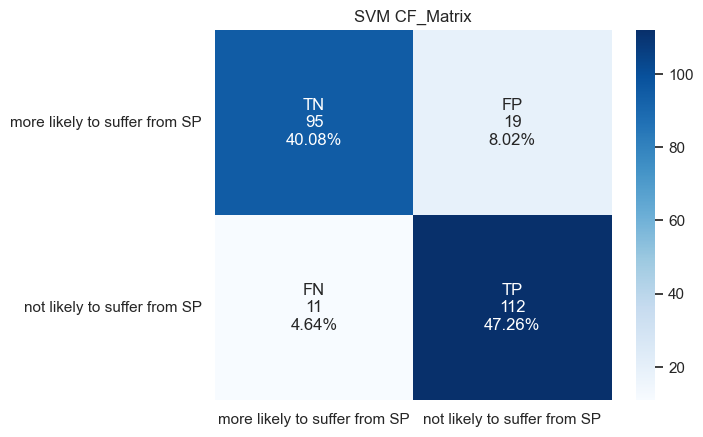

In [116]:
# Plot Confusion Matrix
generate_confusion_matrix(confusion_matrix(y_val, y_val_pred), model_name, figures_path)

In [117]:
# Perform cross-validation:
perform_cross_validation(SVM_model, X_train_scaled, y_train)

CV Score : Mean - 0.9146 | Std - 0.01694 | Min - 0.8954 | Max - 0.9391


__Model Pre-Training Evaluation__

In [118]:
# Get model f1 score before training
svm_model_score = f1_score(y_val, y_val_pred)
print('SVM: F1-Score Pre-Training: ', "%.2f" % (svm_model_score*100))

SVM: F1-Score Pre-Training:  88.19


__Model Training__

Most important parameter is the choice of kernel that will control the manner in which the input variables will be projected.
- kernels in [‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’]
Another critical parameter is the penalty (C) that can effect on the shape of the resulting regions for each class.
- C in [100, 10, 1.0, 0.1, 0.001]

In [119]:
# model_hyperparameter_tuning
model_params = {'kernel': ['linear', 'poly', 'rbf'], 'C':[0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}
svm_grid, svm_grid_pred, svm_test_grid_pred = model_hyperparameter_tuning(SVM_model, model_params, X_train_scaled, y_train, X_val_scaled, X_test_scaled)

__Model Post-Training Evaluation__

In [120]:
svm_grid_score = f1_score(y_val, svm_grid_pred)
print('SVM: F1-Score Post-Training: ', "%.2f" % (svm_grid_score*100))
print('Improvement of {:0.2f}%.'.format( 100 * ((svm_grid_score - svm_model_score) / svm_model_score)))
print('Best Params: '+ str(svm_grid.best_params_))

SVM: F1-Score Post-Training:  97.10
Improvement of 10.10%.
Best Params: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [121]:
# export submission
if svm_model_score >= svm_grid_score:
    svm_f1_score = svm_model_score
    export_submission(model_name, X_test_scaled, y_test_svm, submission_path)
else:
    svm_f1_score = svm_grid_score
    export_submission(model_name, X_test_scaled, svm_test_grid_pred, submission_path)

__`5.4`__ __Decision Tree (DT)__

Classification and Regression Tree (CART) is an algorithm to train Decision Trees (DT). A decision tree returns a response after executing a test sequence, and it is considered one of the most successful methods of machine learning.

In [122]:
model_name = "Decision Tree"
DT_model = DecisionTreeClassifier()

# Fit the algorithm on the data
DT_model.fit(X_train_scaled, y_train)

# Predict training set:
y_train_pred = DT_model.predict(X_train_scaled)

# Predict on validation data:
y_val_pred = DT_model.predict(X_val_scaled)

# Predict on test data
y_test_dt = DT_model.predict(X_test_scaled)

__Model Evaluation__

In [123]:
# Print model report:
generate_classification_report(y_val, y_val_pred)

_______________________Begin Classification Report______________________
Confusion Matrix: 
[[112   2]
 [  1 122]]
Metrics Report: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       114
           1       0.98      0.99      0.99       123

    accuracy                           0.99       237
   macro avg       0.99      0.99      0.99       237
weighted avg       0.99      0.99      0.99       237

_______________________________END Report___________________________


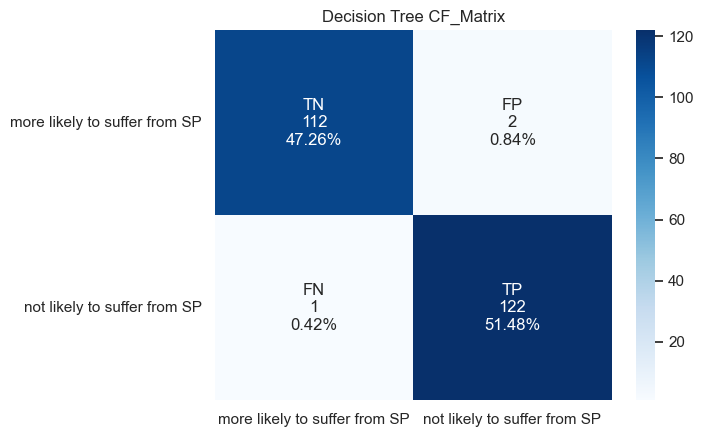

In [124]:
# Plot Confusion Matrix
generate_confusion_matrix(confusion_matrix(y_val, y_val_pred), model_name, figures_path)

In [125]:
# Perform cross-validation:
perform_cross_validation(DT_model, X_train_scaled, y_train)

CV Score : Mean - 0.9601 | Std - 0.01207 | Min - 0.9444 | Max - 0.977


__Model Pre-Training Evaluation__

In [126]:
# Get model f1 score before training
dt_model_score = f1_score(y_val, y_val_pred)
print('DT: F1-Score Pre-Training: ', "%.2f" % (dt_model_score*100))

DT: F1-Score Pre-Training:  98.79


__Model Training__

Decision Trees are prone to overfitting. the model is likely to end up overfitting which is a serious issue in machine learning.
To overcome this issue, we need to carefully adjust the hyperparameters of decision trees.

- One of the challenges in a DT algorithm is finding the best maximum depth of a tree (`max_depth`) i.e.
- Max leaf nodes (`max_leaf_nodes`) caps the number of leaf nodes in a decision tree. allow the branches of a tree to have varying depths.

In [127]:
# calculating the accuracy of models with different values of max_depth
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict
    dt = DecisionTreeClassifier(max_depth = i).fit(X_train_scaled, y_train)
    yhat= dt.predict(X_val_scaled)
    mean_acc[i-1] = metrics.accuracy_score(y_val, yhat)

mean_acc

array([0.73417722, 0.73417722, 0.78481013, 0.78481013, 0.87763713,
       0.88185654, 0.907173  , 0.94092827, 0.97468354, 0.97890295,
       0.98734177, 0.98312236, 0.98312236, 0.98734177, 0.98734177,
       0.99156118, 0.98312236, 0.98734177, 0.98312236, 0.98312236])

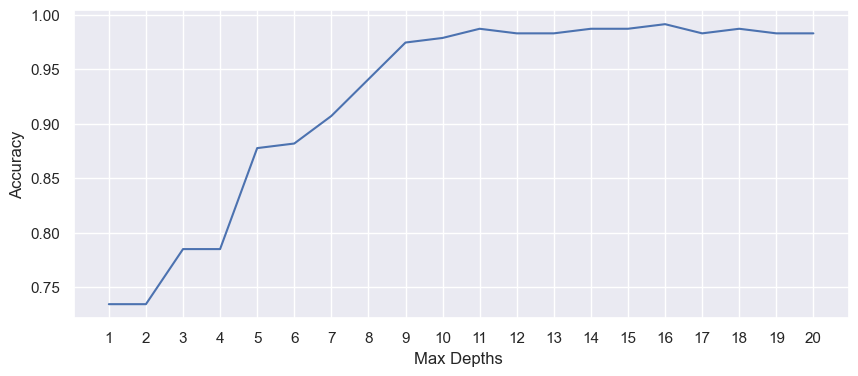

In [128]:
loc = np.arange(1, 21, step=1.0)
plt.figure(figsize = (10, 4))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Max Depths ')
plt.ylabel('Accuracy')
plt.show()

In [168]:
# Create the random grid
dt_model_params = {
    'max_depth': [2,3,4,5,6,7,8,9,10,11,12,None],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30],
    'min_samples_leaf': [1, 2, 10, 20, 30, 40],
    'criterion': ['entropy', 'gini'],
    'splitter': ['best', 'random']
}
dt_grid, dt_grid_pred, dt_test_grid_pred = model_hyperparameter_tuning(DT_model, dt_model_params, X_train_scaled, y_train, X_val_scaled, X_test_scaled)

__Model Post-Training Evaluation__

In [169]:
dt_grid_score = f1_score(y_val, dt_grid_pred)
print('DT: F1-Score Post-Training: ', "%.2f" % (dt_grid_score*100))
print('Improvement of {:0.2f}%.'.format( 100 * ((dt_grid_score - dt_model_score) / dt_model_score)))
print('Best Params: '+ str(dt_grid.best_params_))

DT: F1-Score Post-Training:  98.79
Improvement of 0.00%.
Best Params: {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [170]:
# export submission
if dt_model_score >= dt_grid_score:
    dt_f1_score = dt_model_score
    export_submission(model_name, X_test_scaled, y_test_dt, submission_path)
else:
    dt_f1_score = dt_grid_score
    export_submission(model_name, X_test_scaled, dt_test_grid_pred, submission_path)

__`5.5`__ __Random Forest (RF)__

Random forests are supervised machine learning models that train multiple decision trees and integrate the results by averaging them. Each decision tree makes various kinds of errors, and upon averaging their results, many of these errors are counterbalanced.

In [132]:
# Instantiate model
model_name = "Random Forest"
rf_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)

# Fit the algorithm on train data
rf_model.fit(X_train_scaled, y_train)

# Predict training set:
y_train_pred = rf_model.predict(X_train_scaled)

# Predict on validation data:
y_val_pred = rf_model.predict(X_val_scaled)

# Predict on test data:
y_test_rf = rf_model.predict(X_test_scaled)

__Model Evaluation__

In [133]:
# Print model report:
generate_classification_report(y_val, y_val_pred)

_______________________Begin Classification Report______________________
Confusion Matrix: 
[[113   1]
 [  3 120]]
Metrics Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       114
           1       0.99      0.98      0.98       123

    accuracy                           0.98       237
   macro avg       0.98      0.98      0.98       237
weighted avg       0.98      0.98      0.98       237

_______________________________END Report___________________________


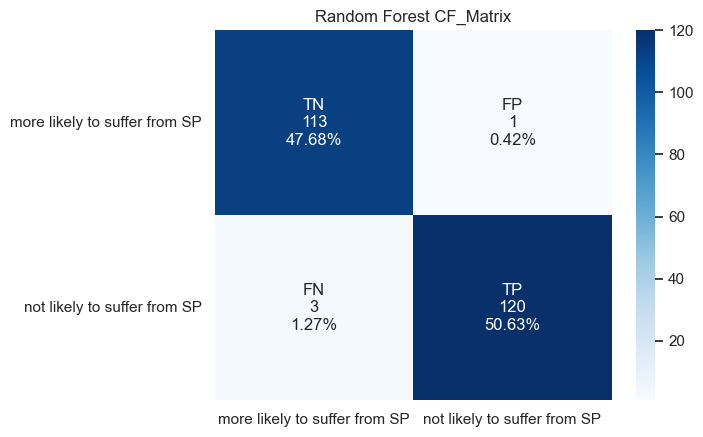

In [134]:
# Plot Confusion Matrix
generate_confusion_matrix(confusion_matrix(y_val, y_val_pred), model_name, figures_path)

In [135]:
# Perform cross-validation:
perform_cross_validation(rf_model, X_train_scaled, y_train)

CV Score : Mean - 0.9524 | Std - 0.01982 | Min - 0.9244 | Max - 0.977


__Model Pre-Training Evaluation__

In [136]:
# Get model f1 score before training
rf_model_score = f1_score(y_val, y_val_pred)
print('RF: F1-Score Pre-Training: ', "%.2f" % (rf_model_score*100))

RF: F1-Score Pre-Training:  98.36


__Model Training__

Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.

Random search can help us to narrow down the range for each hyperparameter to concentrate our search, we can explicitly specify every combination of settings to try. We do this with GridSearchCV,

- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

In [137]:
# Create the random grid
random_grid = {
    'n_estimators': [int(x) for x in np.linspace(start = 1000, stop = 2000, num = 300)],
    'max_depth': [int(x) for x in np.linspace(50, 110, num = 11)],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Use the random grid to search for best parameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 folds cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_scaled, y_train)

print(rf_random.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'n_estimators': 1886, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 80, 'bootstrap': True}


In [138]:
# model_hyperparameter_tuning
rf_model_params = {}
for key, value in rf_random.best_params_.items():
    rf_model_params[key] = [value]

#rf_model_params = rf_random.best_params_
rf_grid, rf_grid_pred, rf_test_grid_pred = model_hyperparameter_tuning(rf_model, rf_model_params, X_train_scaled, y_train, X_val_scaled, X_test_scaled)

__Model Post-Training Evaluation__

In [139]:
rf_grid_score = f1_score(y_val, rf_grid_pred)
print('RF: F1-Score Post-Training: ', "%.2f" % (rf_grid_score*100))
print('Improvement of {:0.2f}%.'.format( 100 * ((rf_grid_score - rf_model_score) / rf_model_score)))
print('Best Params: '+ str(rf_grid.best_params_))

RF: F1-Score Post-Training:  98.78
Improvement of 0.42%.
Best Params: {'bootstrap': True, 'max_depth': 80, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1886}


In [140]:
# export submission
if rf_model_score >= rf_grid_score:
    rf_f1_score = rf_model_score
    export_submission(model_name, X_test_scaled, y_test_rf, submission_path)
else:
    rf_f1_score = rf_grid_score
    export_submission(model_name, X_test_scaled, rf_test_grid_pred, submission_path)

__`5.6`__ __XGBoost Classifier__

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.

XGBoost and Gradient Boosting Machines (GBMs) are both ensemble tree methods that apply the principle of boosting weak learners (CARTs generally) using the gradient descent architecture. However, XGBoost improves upon the base GBM framework through systems optimization and algorithmic enhancements.

In [141]:
# Instantiate model
model_name = "XGBoost"
xgbc_model = xgb.XGBClassifier()

# Fit the algorithm on train data
xgbc_model.fit(X_train_scaled, y_train)

# Predict training set:
y_train_pred = xgbc_model.predict(X_train_scaled)

# Predict on validation data:
y_val_pred = xgbc_model.predict(X_val_scaled)

# Predict on test data:
y_test_xgbc = xgbc_model.predict(X_test_scaled)

__Model Evaluation__

In [142]:
# Print model report:
generate_classification_report(y_val, y_val_pred)

_______________________Begin Classification Report______________________
Confusion Matrix: 
[[113   1]
 [  2 121]]
Metrics Report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       114
           1       0.99      0.98      0.99       123

    accuracy                           0.99       237
   macro avg       0.99      0.99      0.99       237
weighted avg       0.99      0.99      0.99       237

_______________________________END Report___________________________


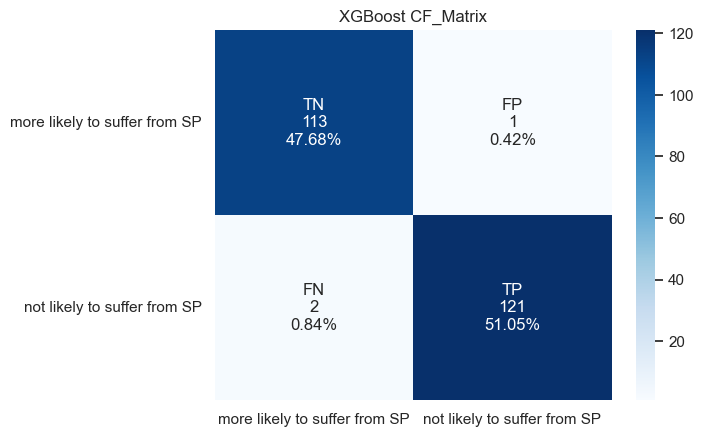

In [143]:
# Plot Confusion Matrix
generate_confusion_matrix(confusion_matrix(y_val, y_val_pred), model_name, figures_path)

In [144]:
# Perform cross-validation:
perform_cross_validation(xgbc_model, X_train_scaled, y_train)

CV Score : Mean - 0.9658 | Std - 0.012 | Min - 0.9492 | Max - 0.9816


__Model Pre-Training Evaluation__

In [145]:
# Get model f1 score before training
xgbc_model_score = f1_score(y_val, y_val_pred)
print('XGB: F1-Score Pre-Training: ', "%.2f" % (xgbc_model_score*100))

XGB: F1-Score Pre-Training:  98.78


__Model Training__

XGBoost provides large range of hyperparameters. We can leverage the maximum power of XGBoost by tuning its hyperparameters.

most common parameters:
- max_depth: The maximum depth per tree.
- learning_rate: The learning rate determines the step size at each iteration while your model optimizes toward its objective.
- n_estimators: The number of trees in our ensemble. Equivalent to the number of boosting rounds.
- colsample_bytree: Represents the fraction of columns to be randomly sampled for each tree.
- subsample: Represents the fraction of observations to be sampled for each tree.

In [146]:
# model_hyperparameter_tuning
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}
xgbr = xgb.XGBRegressor()
clf = RandomizedSearchCV(estimator=xgbr, param_distributions=params, scoring='neg_mean_squared_error', n_iter=25, verbose=1)

#clf.fit(X_train_scaled, y_train)
# print("Best parameters:", clf.best_params_)
# Best parameters: {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 20, 'learning_rate': 0.2, 'colsample_bytree': 0.8999999999999999, 'colsample_bylevel': 0.6}
#print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))
# Lowest RMSE:  0.19865492923300498

In [147]:
xgbc_model_params = {
    'max_depth': [20],
    'learning_rate': [0.2],
    'n_estimators': [500],
    'colsample_bytree': [0.8999999999999999],
    'colsample_bylevel': [0.6],
    'subsample': [0.7]
}
xgbc_grid, xgbc_grid_pred, xgbc_test_grid_pred = model_hyperparameter_tuning(xgbc_model, xgbc_model_params, X_train_scaled, y_train, X_val_scaled, X_test_scaled)

__Model Post-Training Evaluation__

In [148]:
xgbc_grid_score = f1_score(y_val, xgbc_grid_pred)
print('XGB: F1-Score Post-Training: ', "%.2f" % (xgbc_grid_score*100))
print('Improvement of {:0.2f}%.'.format( 100 * ((xgbc_grid_score - xgbc_model_score) / xgbc_model_score)))
print('Best Params: '+ str(xgbc_grid.best_params_))

XGB: F1-Score Post-Training:  99.60
Improvement of 0.83%.
Best Params: {'colsample_bylevel': 0.6, 'colsample_bytree': 0.8999999999999999, 'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 500, 'subsample': 0.7}


In [149]:
# export submission
if xgbc_model_score >= xgbc_grid_score:
    xgbc_f1_score = xgbc_model_score
    export_submission(model_name, X_test_scaled, y_test_xgbc, submission_path)
else:
    xgbc_f1_score = xgbc_grid_score
    export_submission(model_name, X_test_scaled, xgbc_test_grid_pred, submission_path)

__Performance Assessment__

__ROC CURVE__

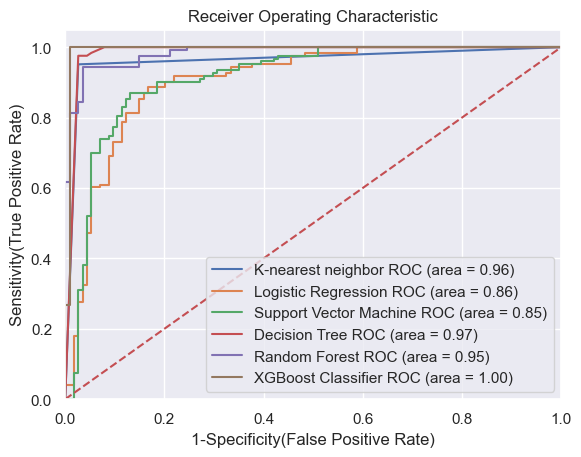

In [150]:
# Add the models to the list that you want to view on the ROC plot
models = [
    {
        'label': 'K-nearest neighbor',
        'model': KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='manhattan', n_neighbors=1, p=2, weights='uniform'),
    },
    {
        'label': 'Logistic Regression',
        'model': LogisticRegression(C=10, penalty='l2', solver='liblinear'),
    },
    {
        'label': 'Support Vector Machine',
        'model': svm.SVC(kernel='rbf', C=10, gamma=0.01, probability=True),
    },
    {
        'label': 'Decision Tree',
        'model': DecisionTreeClassifier(max_depth= 9, max_leaf_nodes=955, min_samples_leaf= 1, min_samples_split= 2, splitter= 'best')
    },
    {
        'label': 'Random Forest',
        'model': RandomForestClassifier(n_estimators = 1886, min_samples_split= 2, min_samples_leaf= 2, max_depth= 80, bootstrap= True)
    },
    {
        'label': 'XGBoost Classifier',
        'model': xgb.XGBClassifier(n_estimators= 500, max_depth= 20, colsample_bylevel=0.6, colsample_bytree=0.9, learning_rate= 0.2)
    }
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train_scaled, y_train) # train the model
    y_pred=model.predict(X_val_scaled) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_val, model.predict_proba(X_val_scaled)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_val, model.predict(X_val_scaled))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

__Stacking__

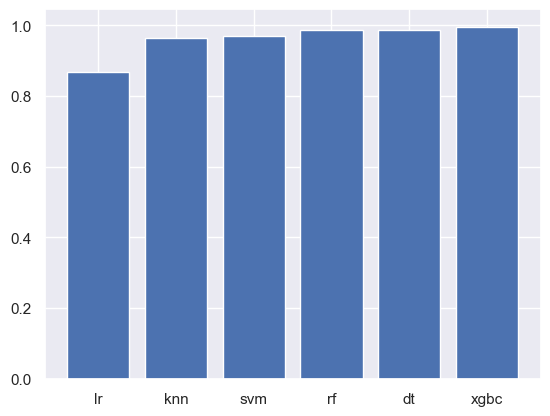

In [151]:
accuracies = [lr_f1_score, knn_f1_score, dt_f1_score, rf_f1_score, svm_f1_score, xgbc_f1_score]
models = ['lr','knn','dt','rf', 'svm', 'xgbc']
data_tuples = list(zip(models,accuracies))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1])
plt.show()

In [152]:
estimators = [('dt', DecisionTreeClassifier(max_depth= 9, max_leaf_nodes=955, min_samples_leaf= 1, min_samples_split= 2, splitter= 'best')),
              ('xgbc', xgb.XGBClassifier(n_estimators= 500, max_depth= 20, colsample_bylevel=0.6, colsample_bytree=0.9, learning_rate= 0.2))]

In [153]:
st = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()).fit(X_train_scaled, y_train)

In [154]:
stack_f1_score = f1_score(y_val, st.predict(X_val_scaled))
print('Stack: F1-Score Post-Training: ', "%.2f" % (stack_f1_score*100))
stack_test_pred = st.predict(X_test_scaled)

export_submission('stack', X_test_scaled, stack_test_pred, submission_path)

Stack: F1-Score Post-Training:  99.60


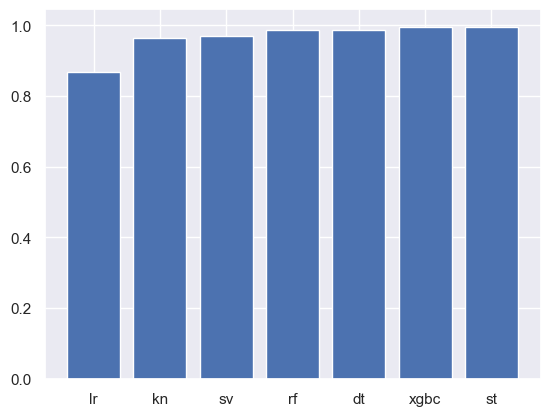

In [155]:
accuracies = [lr_f1_score, knn_f1_score, dt_f1_score, rf_f1_score, svm_f1_score, xgbc_f1_score, stack_f1_score]

models = ['lr','kn','dt','rf', 'sv', 'xgbc', 'st']
data_tuples = list(zip(models,accuracies))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1])
plt.show()

__F1 Score__

In [156]:
knn_f1_score

0.9629629629629629

In [157]:
lr_f1_score

0.8685258964143426

In [158]:
dt_f1_score

0.9878542510121457

In [159]:
svm_f1_score

0.970954356846473

In [160]:
rf_f1_score

0.9877551020408164

In [161]:
xgbc_f1_score

0.9959514170040485

In [162]:
stack_f1_score

0.9959514170040485